In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:

%matplotlib inline

In [3]:
cd /Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift/

/Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift


In [4]:
series = pd.read_csv('train/subj2_series1_data.csv', index_col=0)
print(series.head())

                 Fp1  Fp2   F7   F3  Fz   F4  F8  FC5  FC1  FC2  ...    P7  \
id                                                               ...         
subj2_series1_0  642  165 -291 -223   5  425  70  176  322  212  ...   343   
subj2_series1_1  641  180 -269 -184   4  463  68  198  367  232  ...   378   
subj2_series1_2  652  249 -306 -186  -5  492  98  200  361  234  ...   370   
subj2_series1_3  624  151 -361 -239  -3  448  96  114  295  178  ...   324   
subj2_series1_4  522   67 -438 -354  -6  315 -60   23  201   94  ...   270   

                  P3   Pz   P4   P8  PO9   O1   Oz  O2  PO10  
id                                                            
subj2_series1_0  715  470  262  374   45  403  505  22   175  
subj2_series1_1  732  465  270  348  130  406  496  47   184  
subj2_series1_2  723  469  247  303  147  405  481  15   122  
subj2_series1_3  657  407  190  245  109  357  449  -5   168  
subj2_series1_4  603  326  113  159  117  322  406 -32   194  

[5 rows x 3

In [5]:
events = pd.read_csv('train/subj2_series1_events.csv', index_col=0)
print(events.head())

                 HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
id                                                                         
subj2_series1_0          0                0                   0        0   
subj2_series1_1          0                0                   0        0   
subj2_series1_2          0                0                   0        0   
subj2_series1_3          0                0                   0        0   
subj2_series1_4          0                0                   0        0   

                 Replace  BothReleased  
id                                      
subj2_series1_0        0             0  
subj2_series1_1        0             0  
subj2_series1_2        0             0  
subj2_series1_3        0             0  
subj2_series1_4        0             0  


In [6]:
# are there overlapping classes?
sum_events = events.sum(axis=1)

# if a row in the events data frame has sum greater than one,
# it means that more than one action is recorded at the same time
print("Number of rows where two events are happen simultaneously:", len(sum_events[sum_events == 2]))
print("Number of rows where three events are happen simultaneously:", len(sum_events[sum_events == 3]))
print("Number of rows where four events are happen simultaneously:", len(sum_events[sum_events == 4]))

Number of rows where two events are happen simultaneously: 2441
Number of rows where three events are happen simultaneously: 0
Number of rows where four events are happen simultaneously: 0


In [7]:
# let's convert the events data frame to a single vector of events
# the encoding is the following
# 0: no action occurrs
# 1: HandStart
# 2: FirstDigitTouch
# 3: BothStartLoadPhase
# 4: LiftOff
# 5: Replace
# 6: BothReleased
# NOTE: What do we do with the overlapping classes?
# For now, I'm just going to take the first label
# For example, if 'BothStartLoadPhase' and 'Replace' are both 1 in one row,
# the row looks like [0, 0, 0, 1, 1, 0], but I will say that the label for
# the row is just 3 (BothStartLoadPhase)
num_samples = len(events)
labels = np.zeros(num_samples) # start with an array of all zeros
non_zero = np.any(events.values > 0, axis=1) # get a Boolean array indicating which rows have at least one 1
# the class label is the one plus the index of the first occurrence of 1
labels[non_zero] = (np.argmax(events.values, axis=1)[non_zero] + 1) 

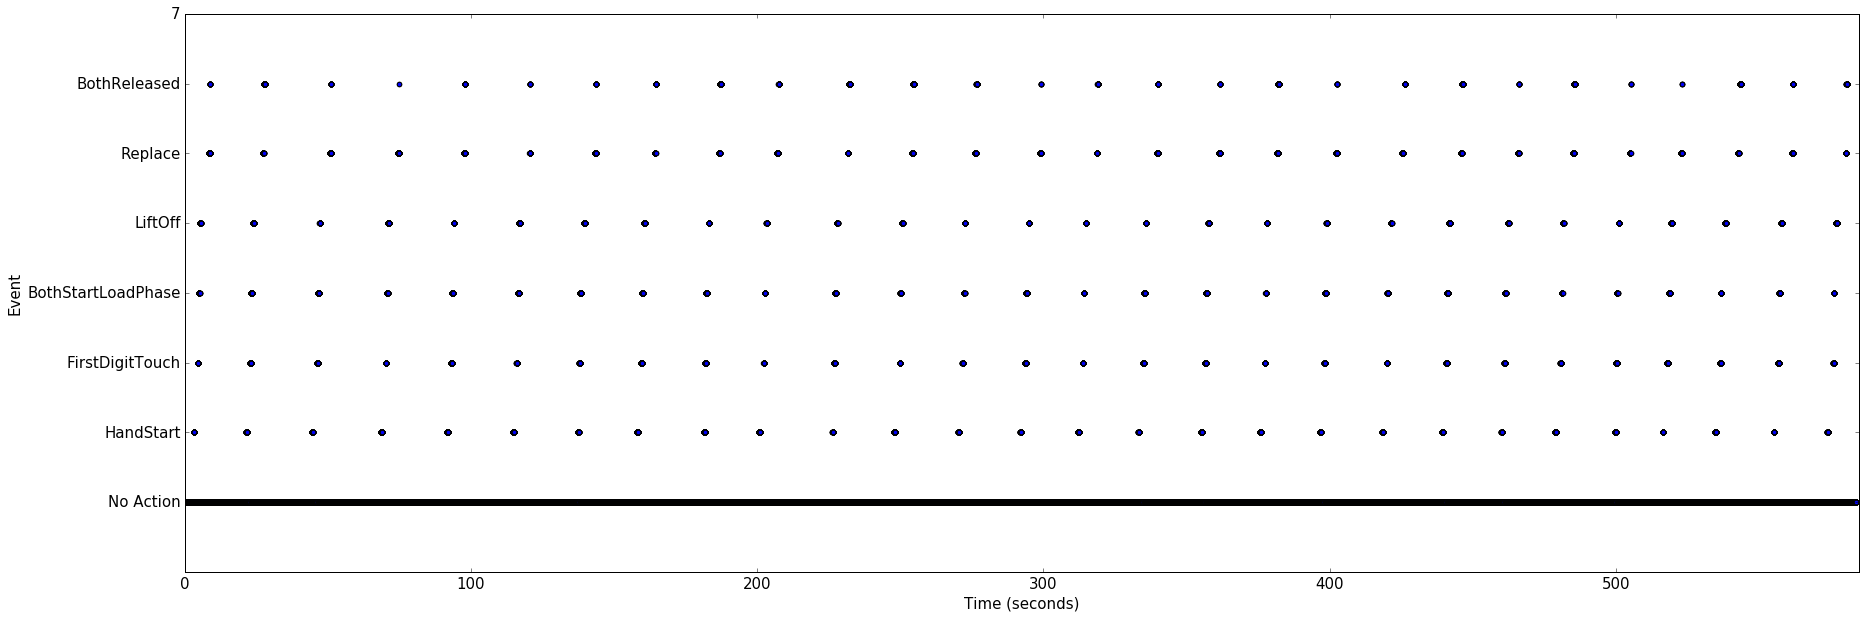

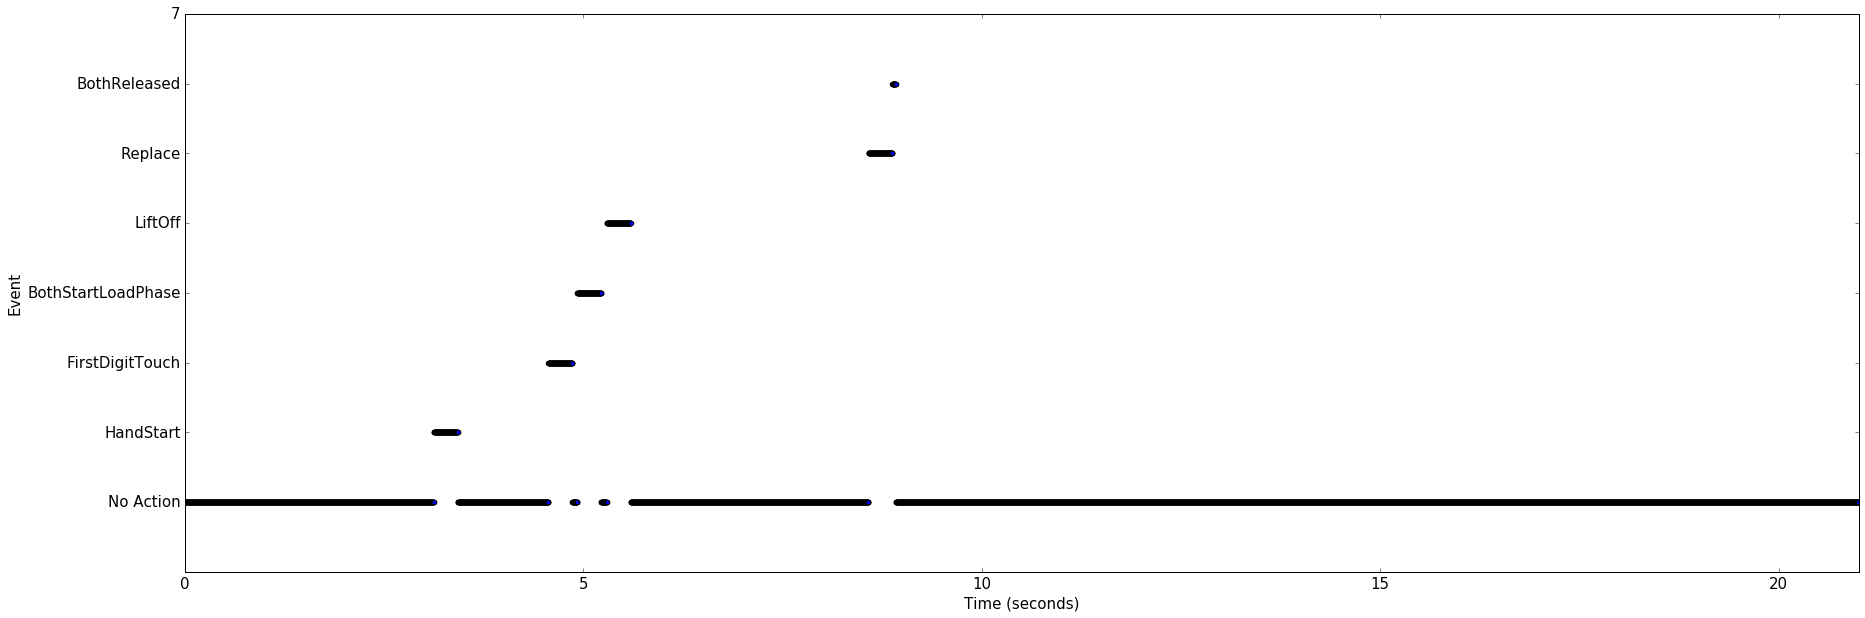

In [12]:
# OK. Let's plot it
sampling_rate = 500.
# prepare the x-axis. We divide by the sampling rate to get time in seconds
x_axis = np.arange(num_samples) / sampling_rate

# make font bigger
matplotlib.rcParams.update({'font.size': 15})

# full time series
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis, labels)
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, x_axis[-1] + 1)
locations = range(8)
names = ["No Action", "HandStart", "FirstDigitTouch", "BothStartLoadPhase", "LiftOff", "Replace", "BothReleased", "7"]
plt.yticks(locations, names)
plt.show()
plt.close()

# the first 21 seconds
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis[:10500], labels[:10500])
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.yticks(locations, names)
plt.xlim(0, 21)
plt.show()
plt.close()


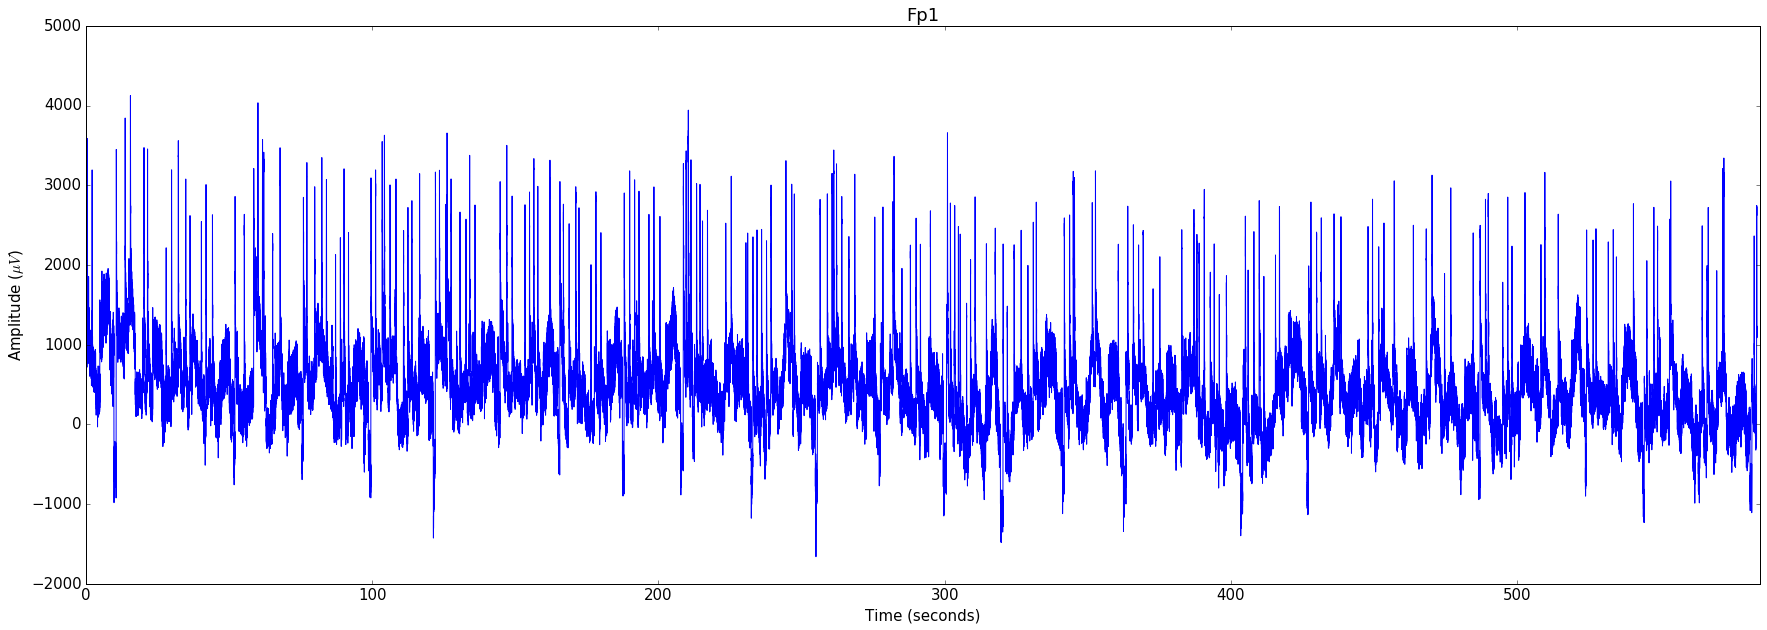

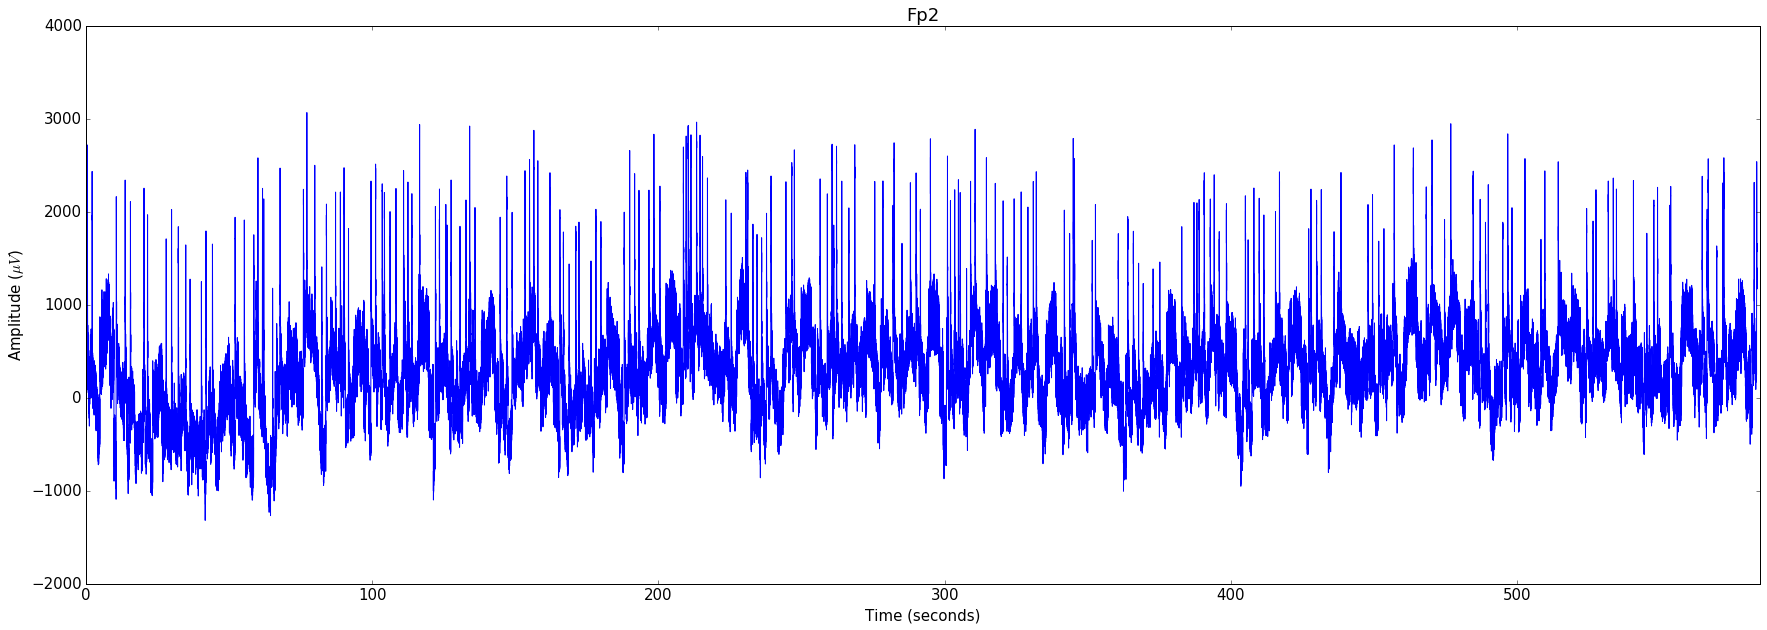

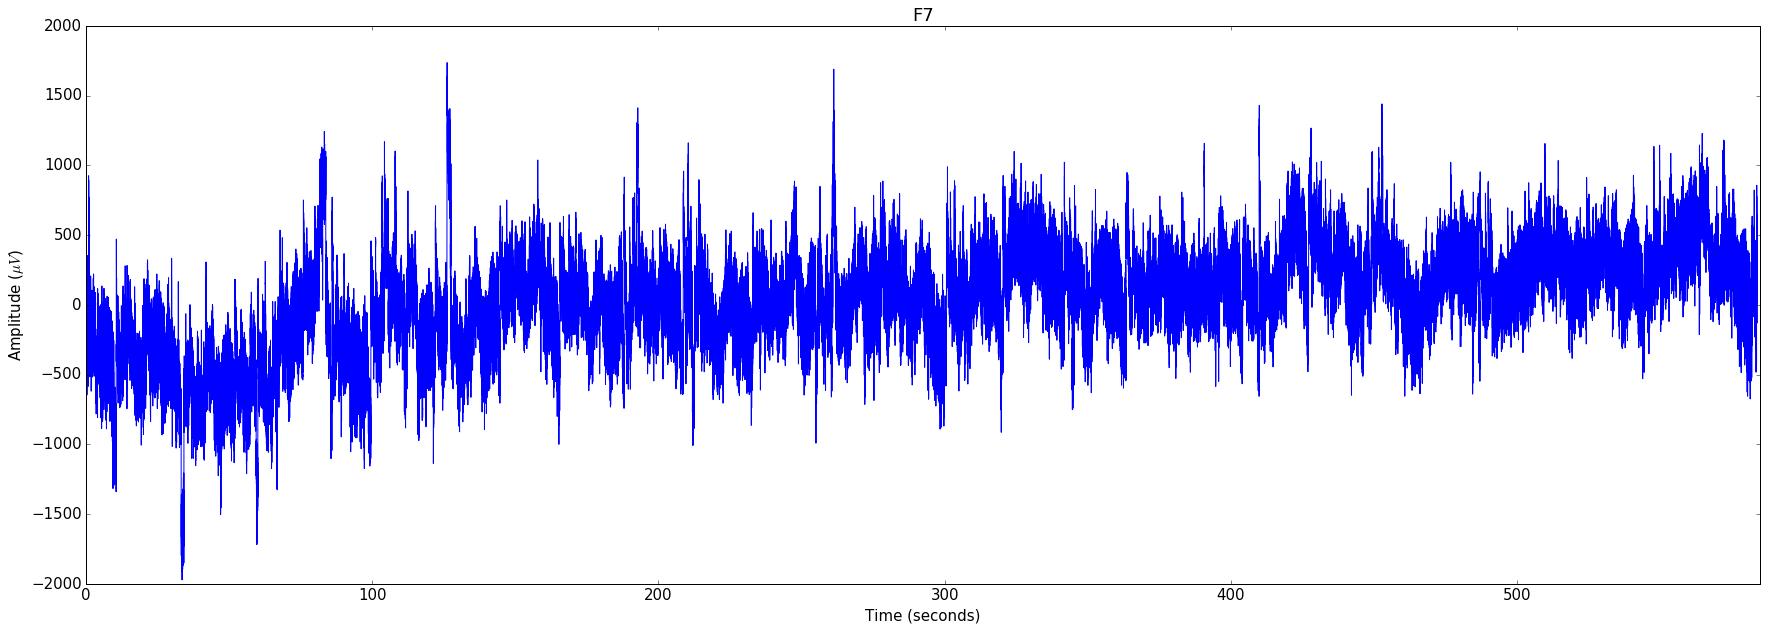

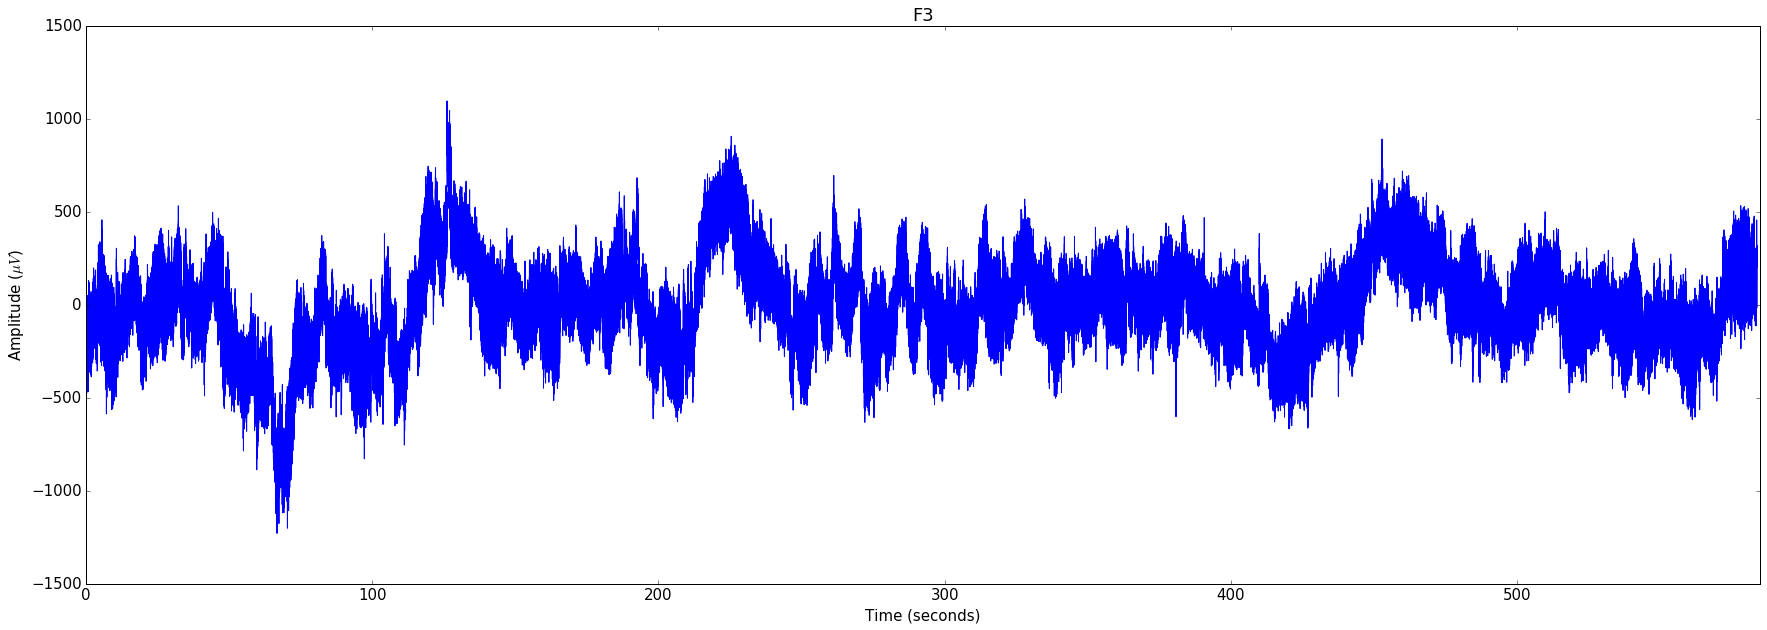

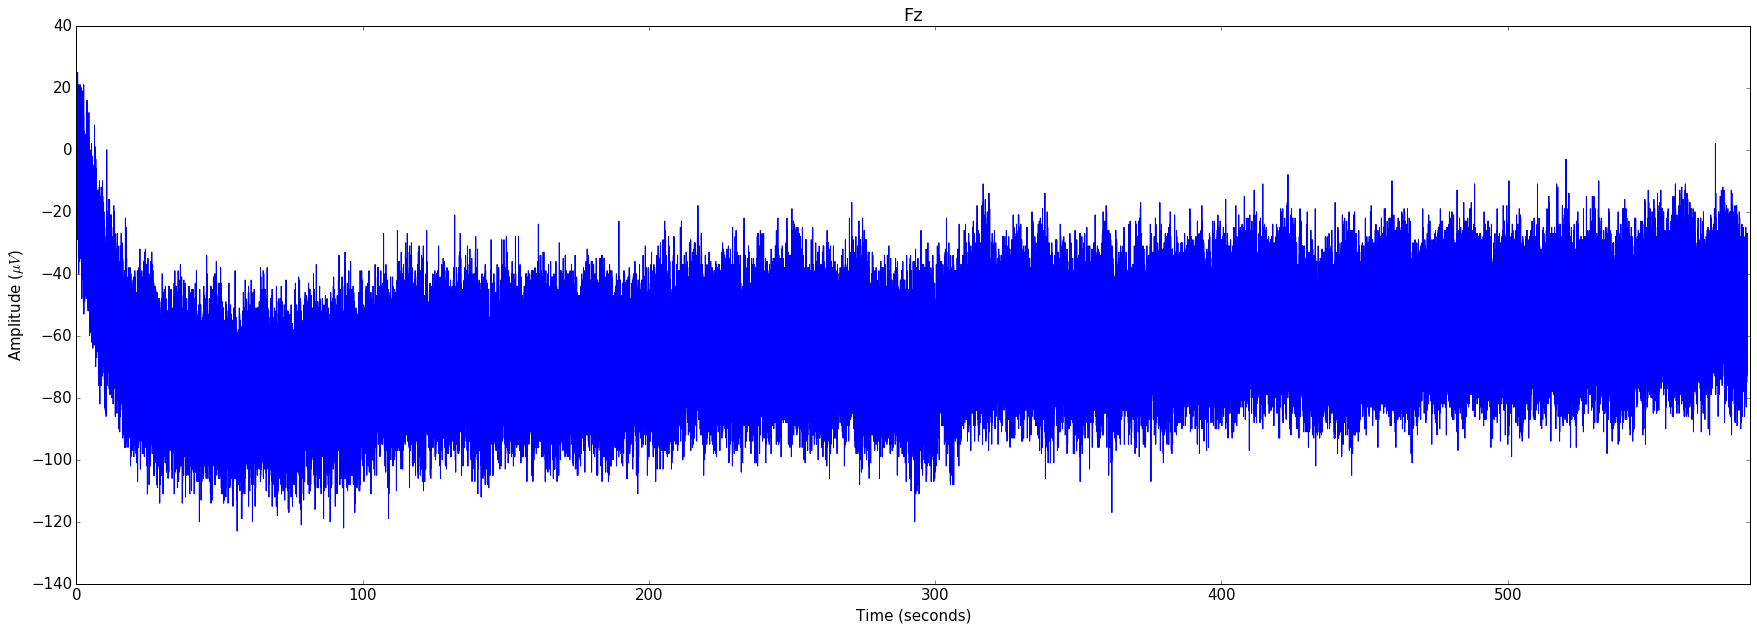

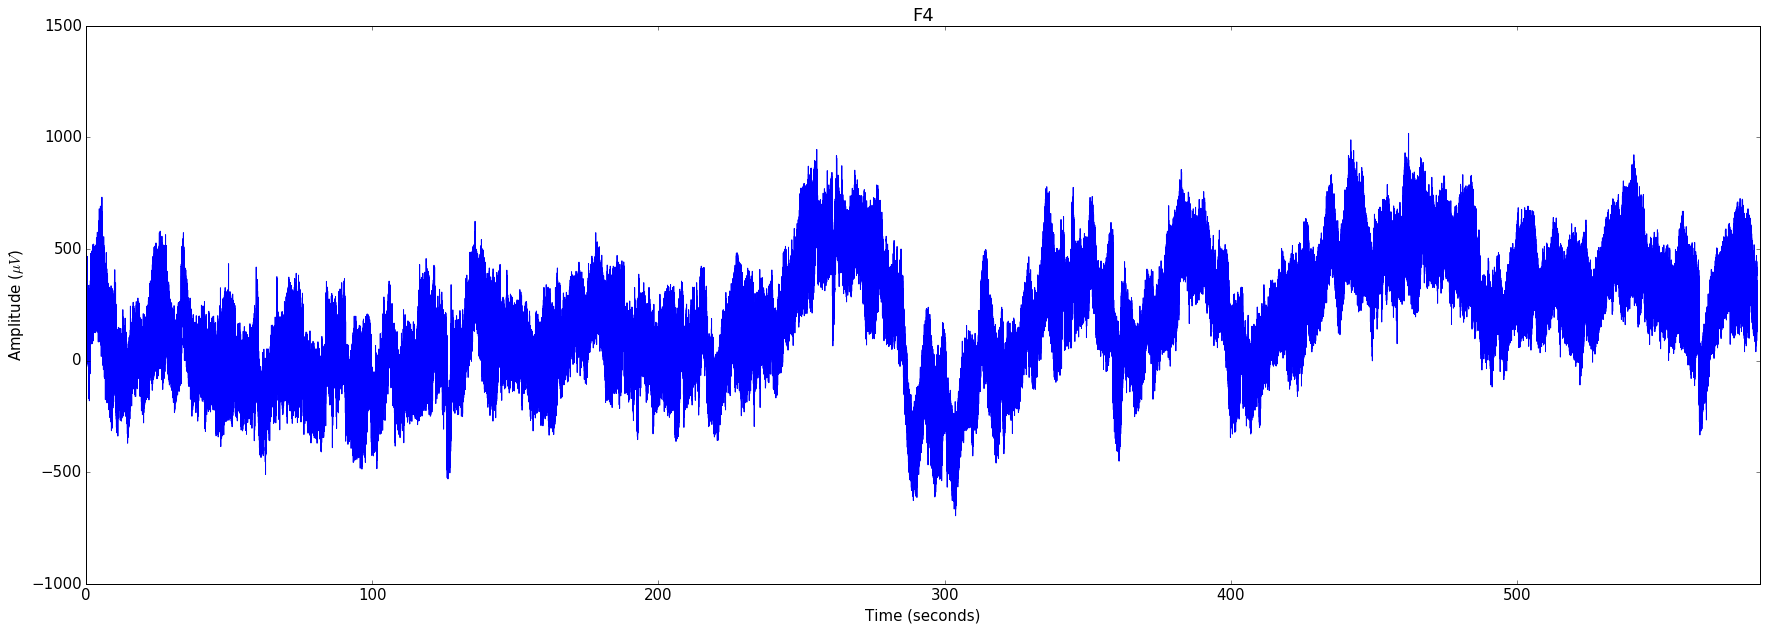

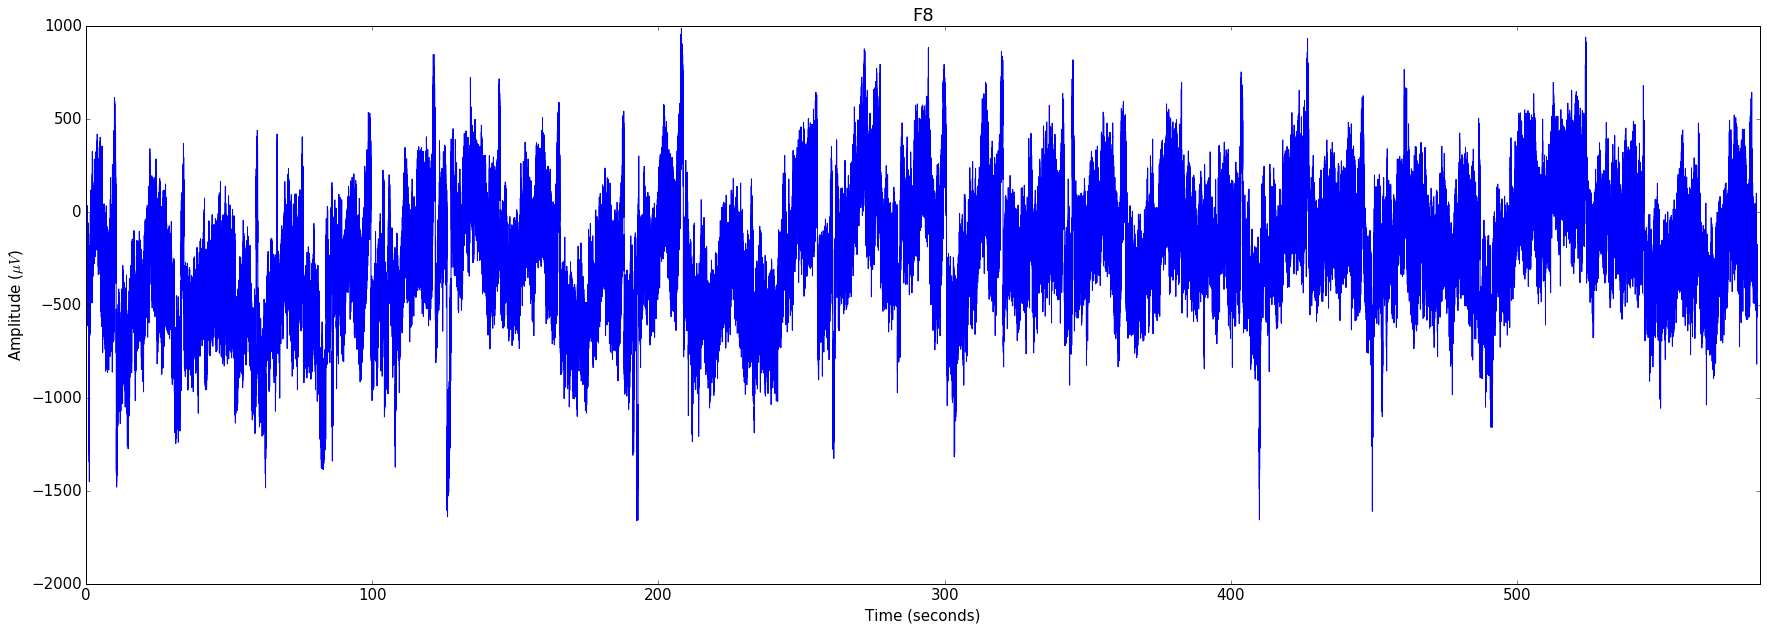

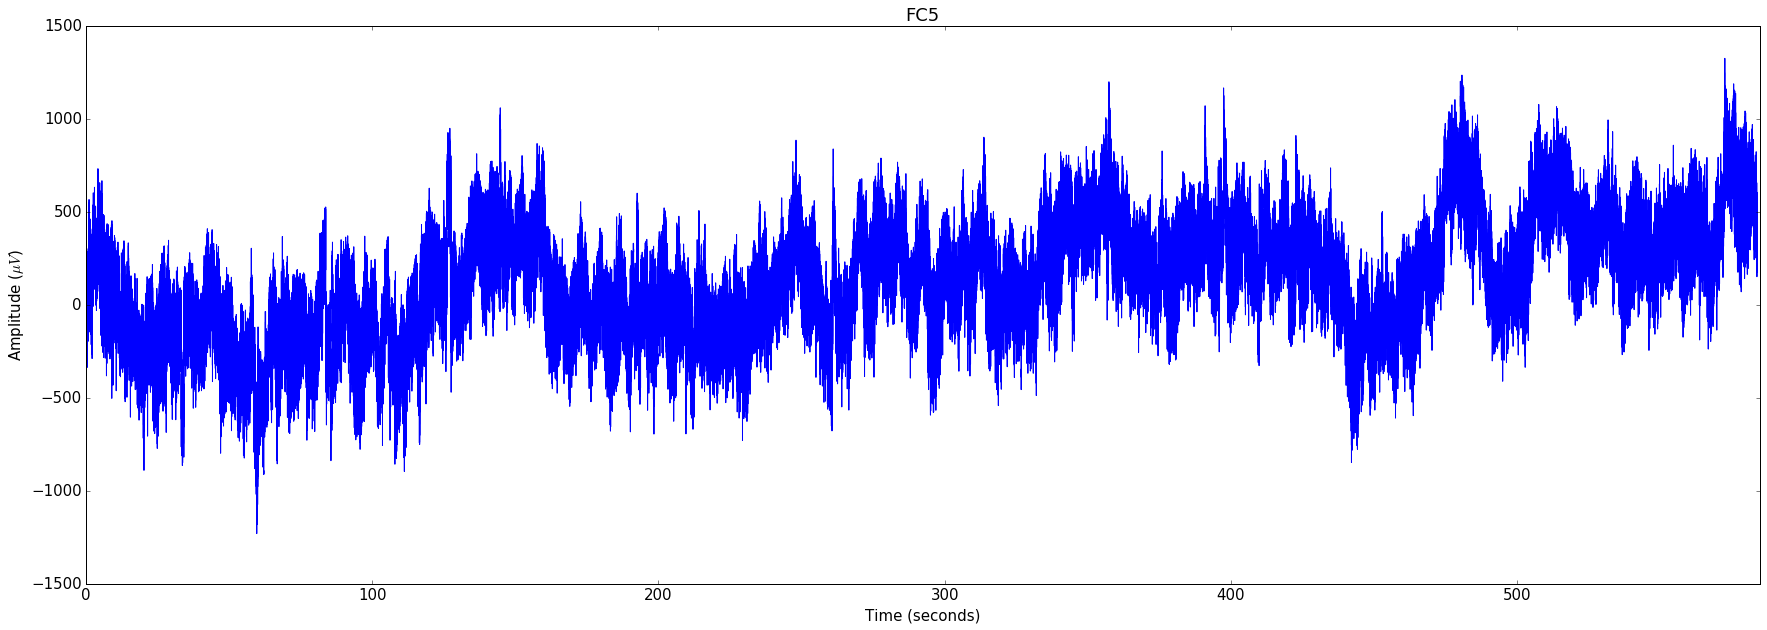

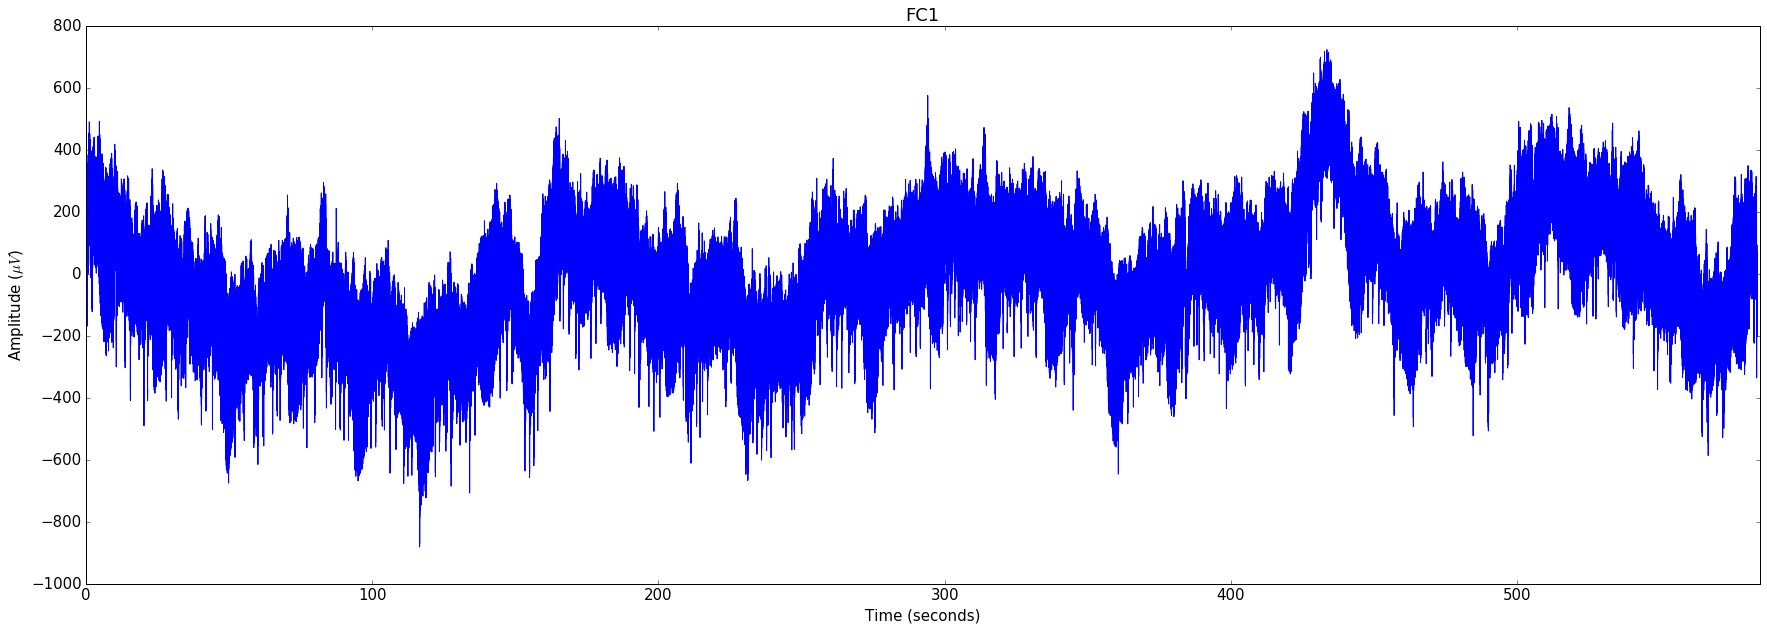

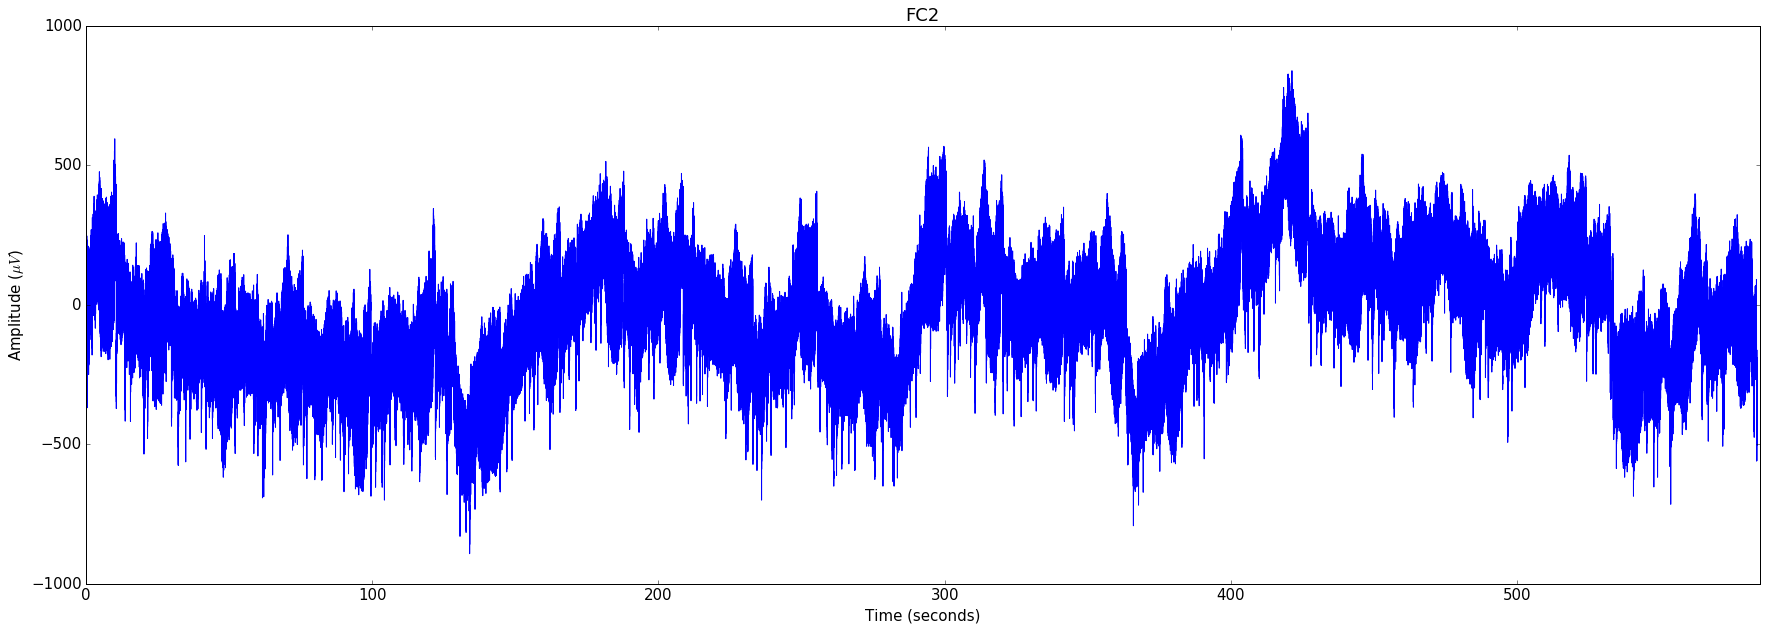

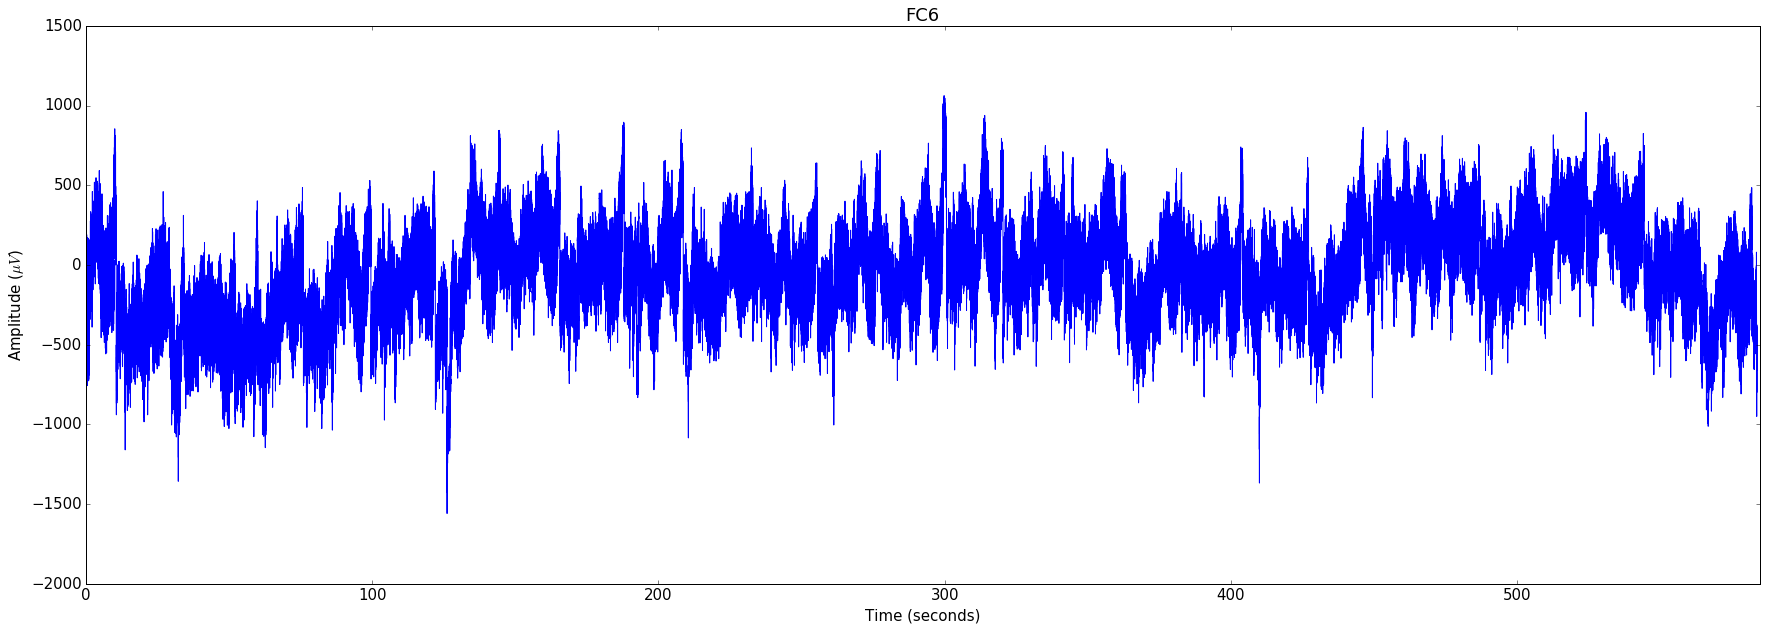

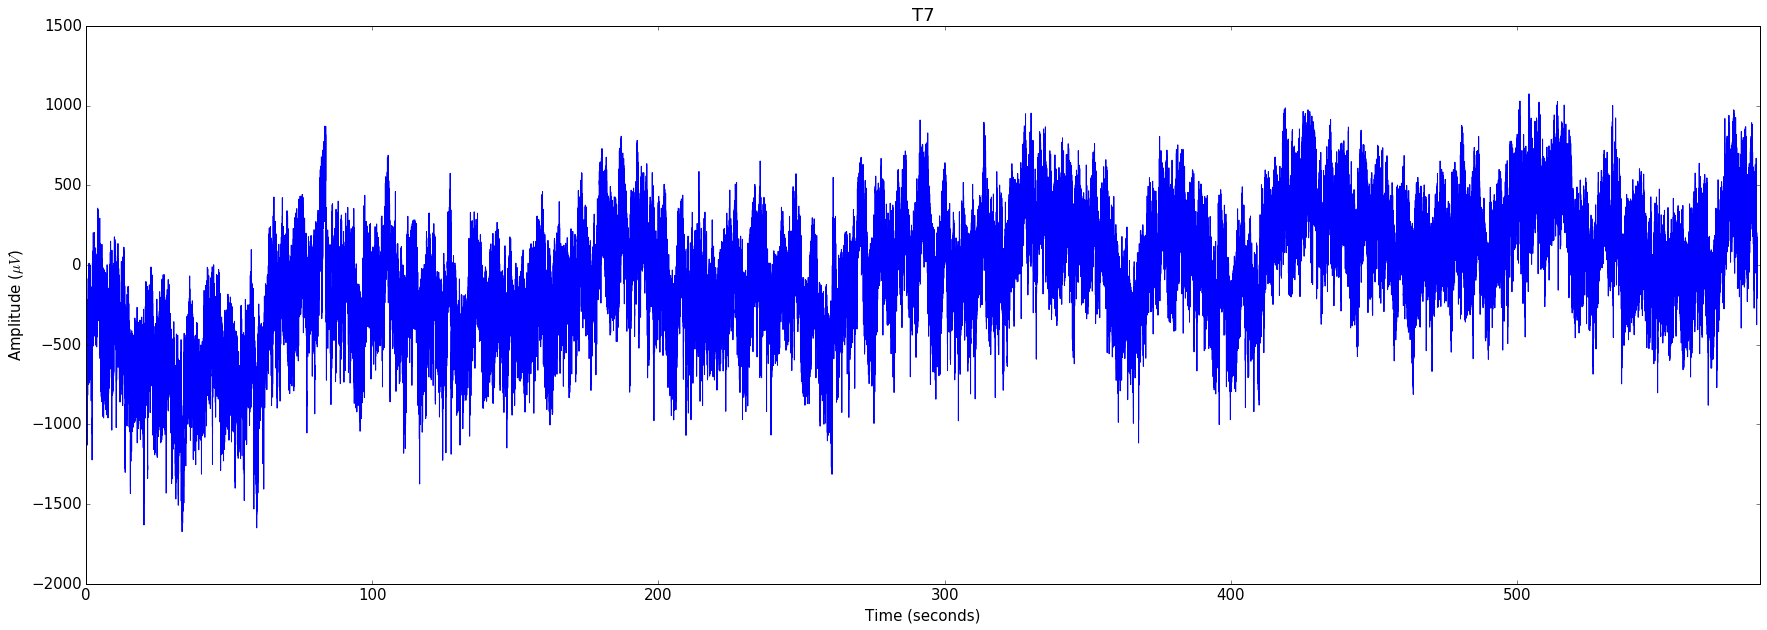

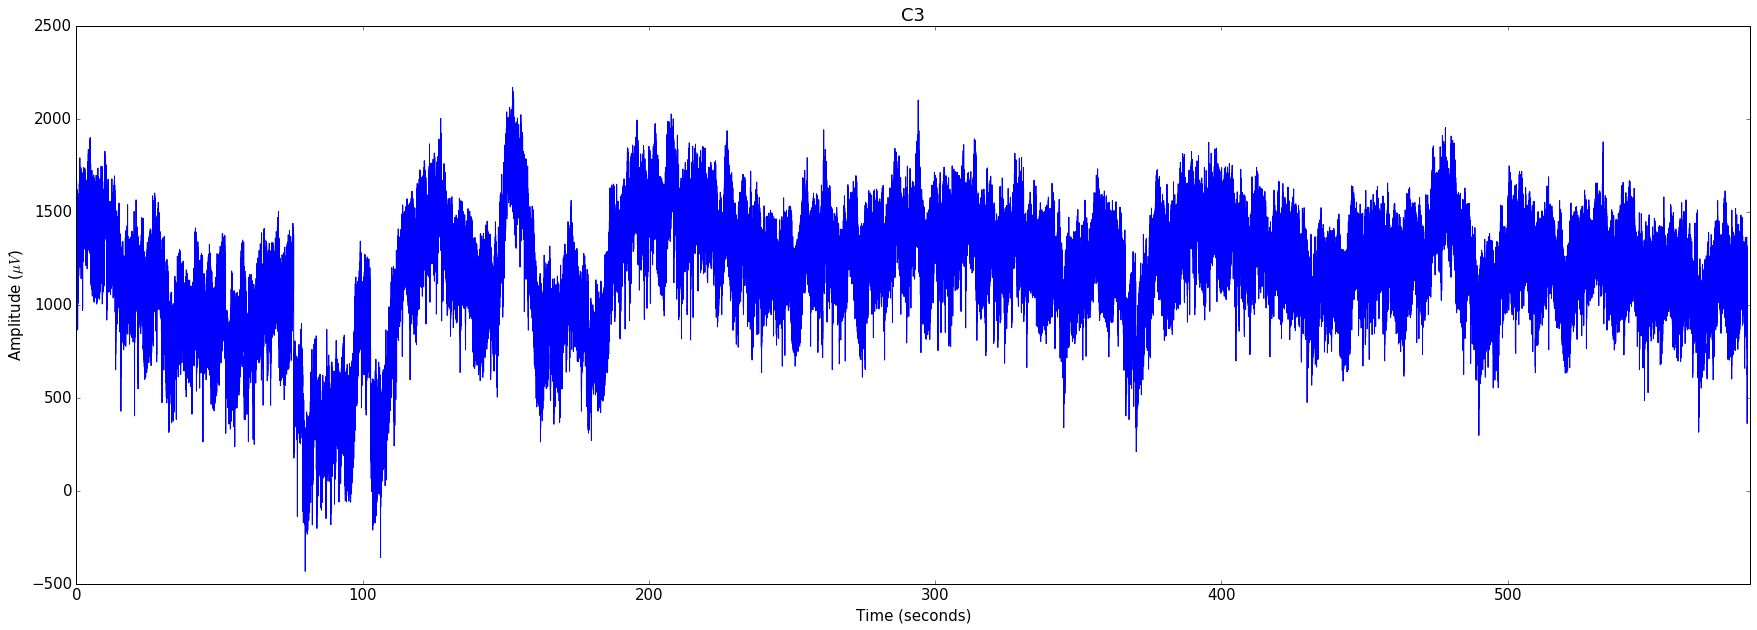

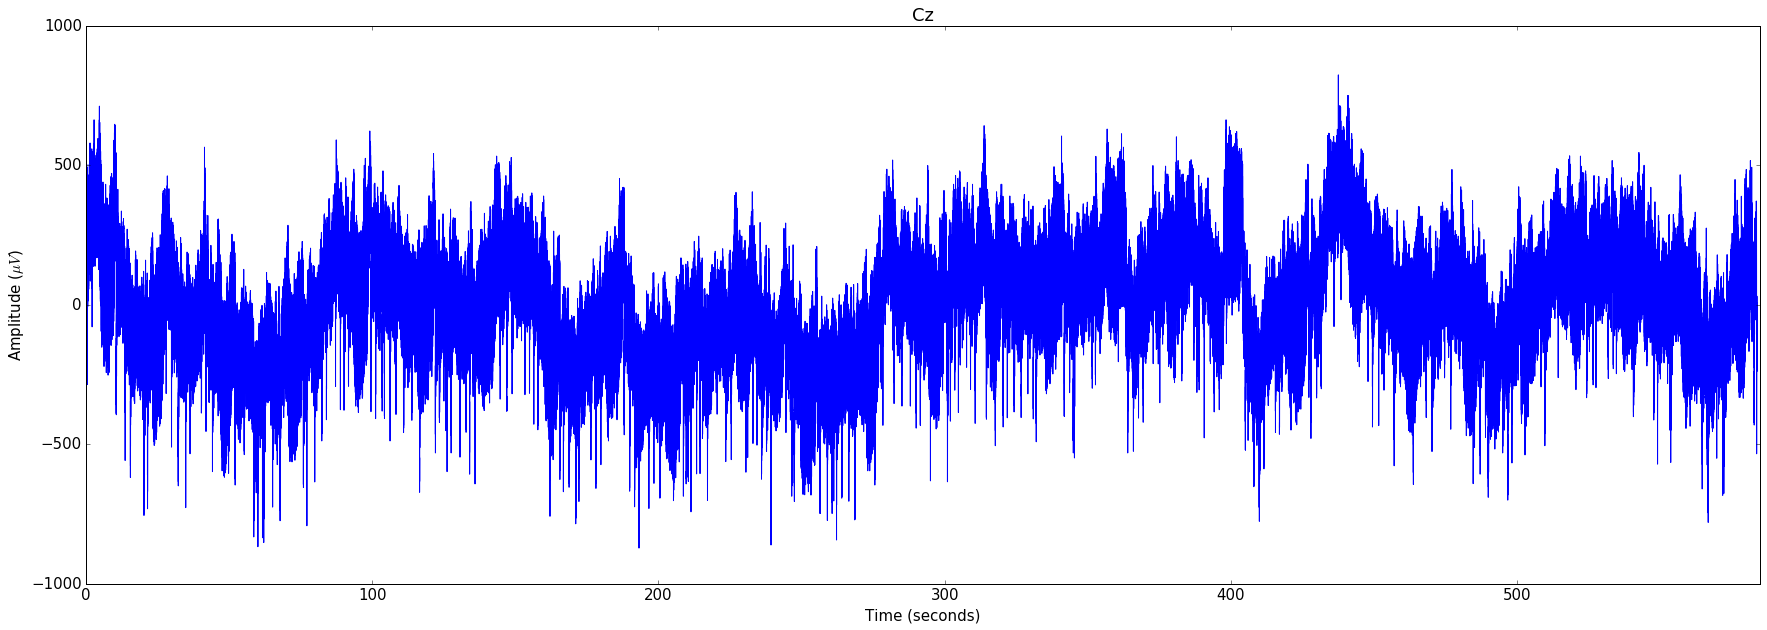

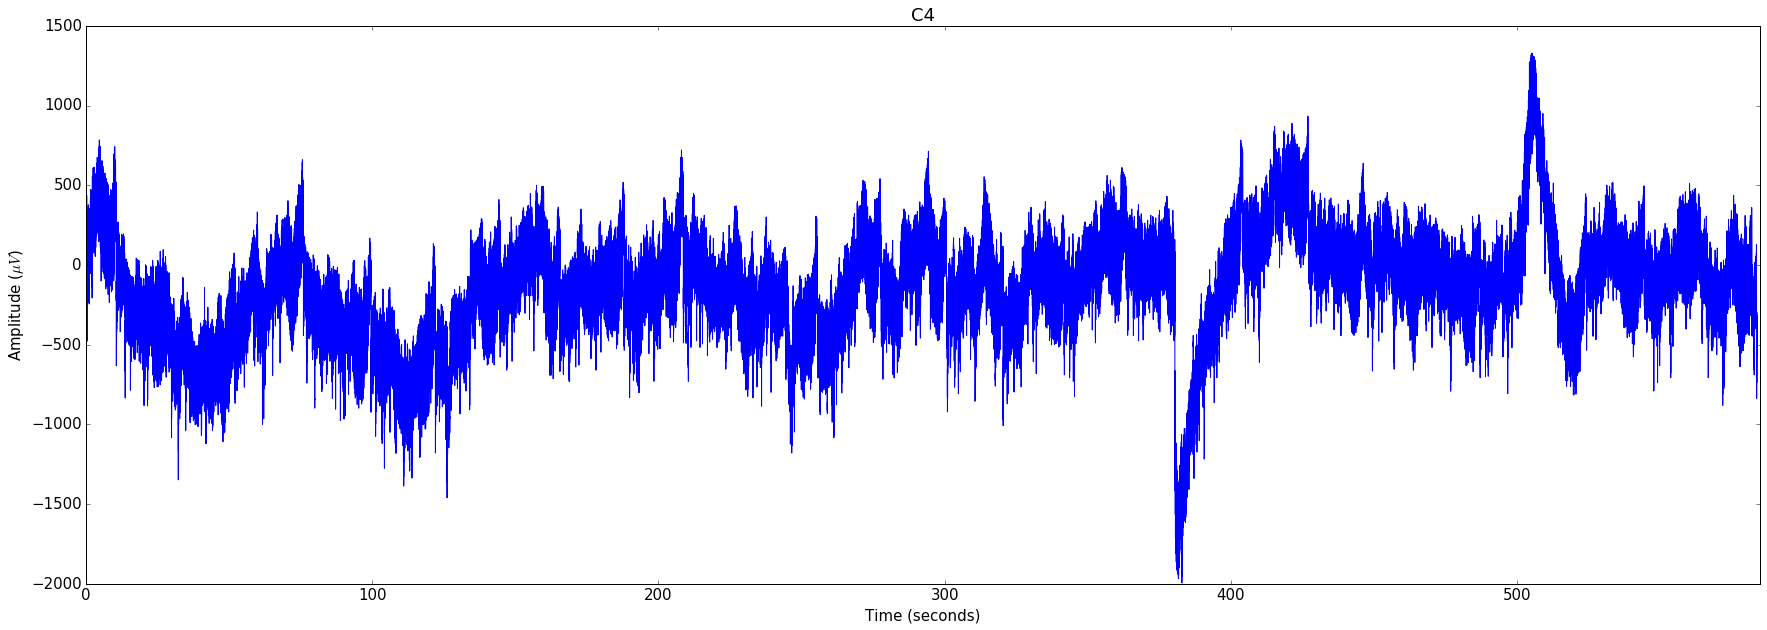

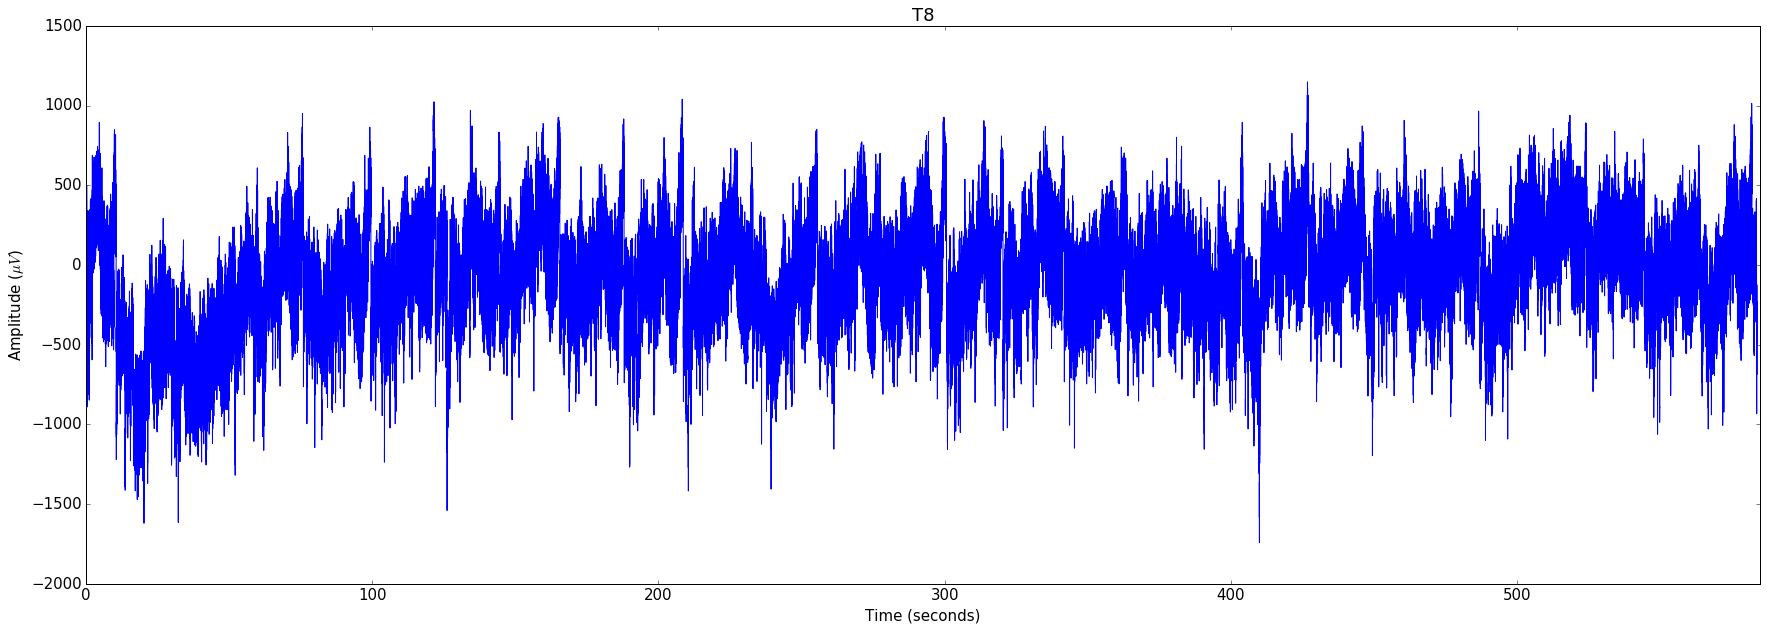

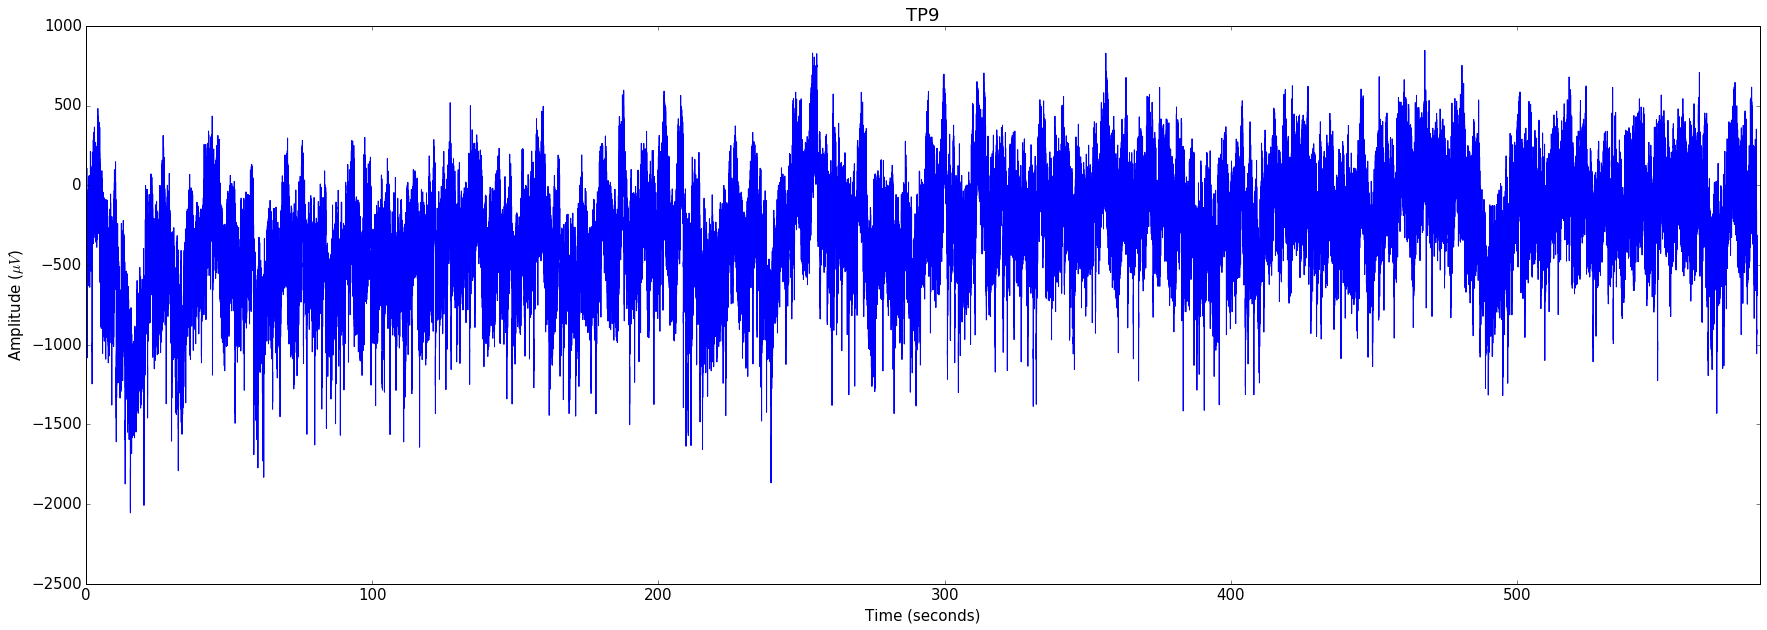

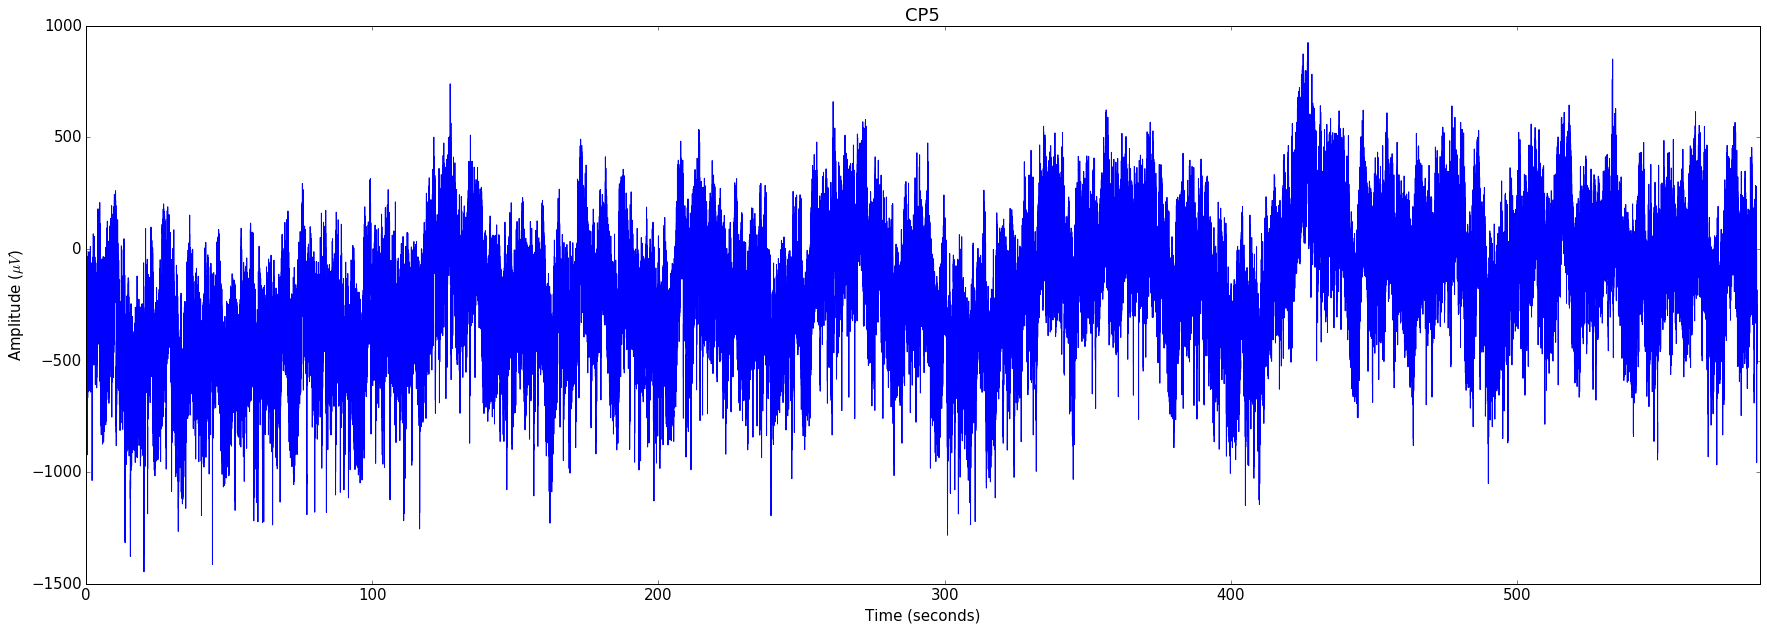

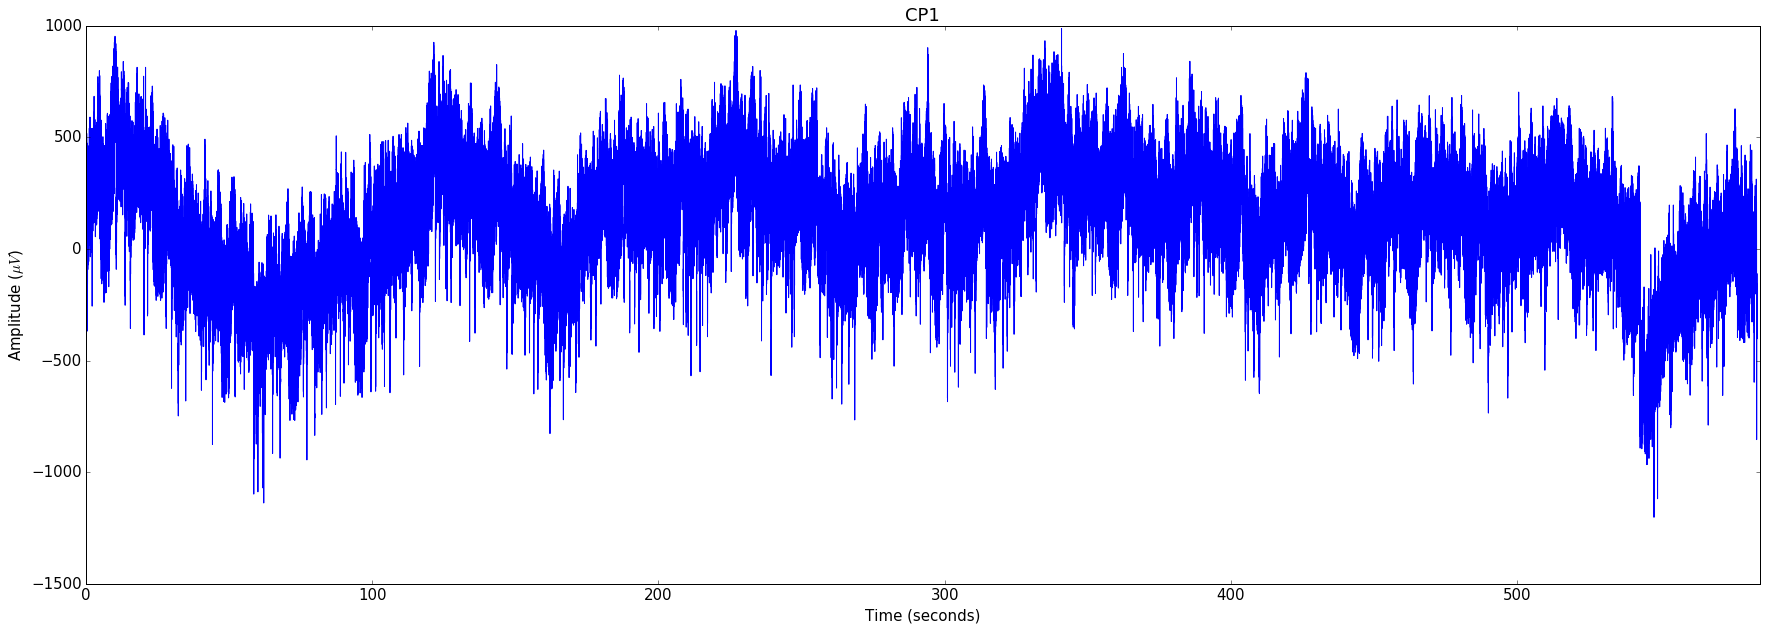

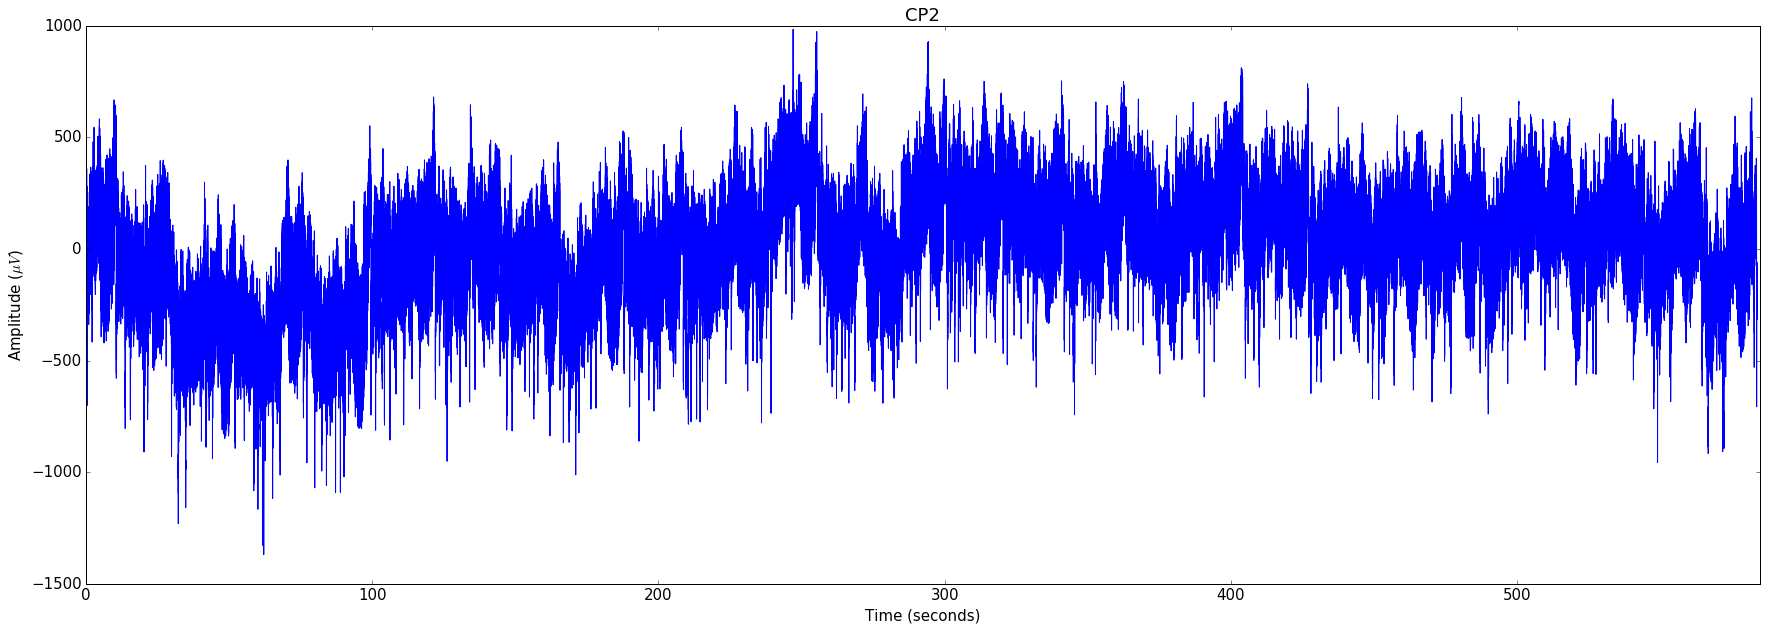

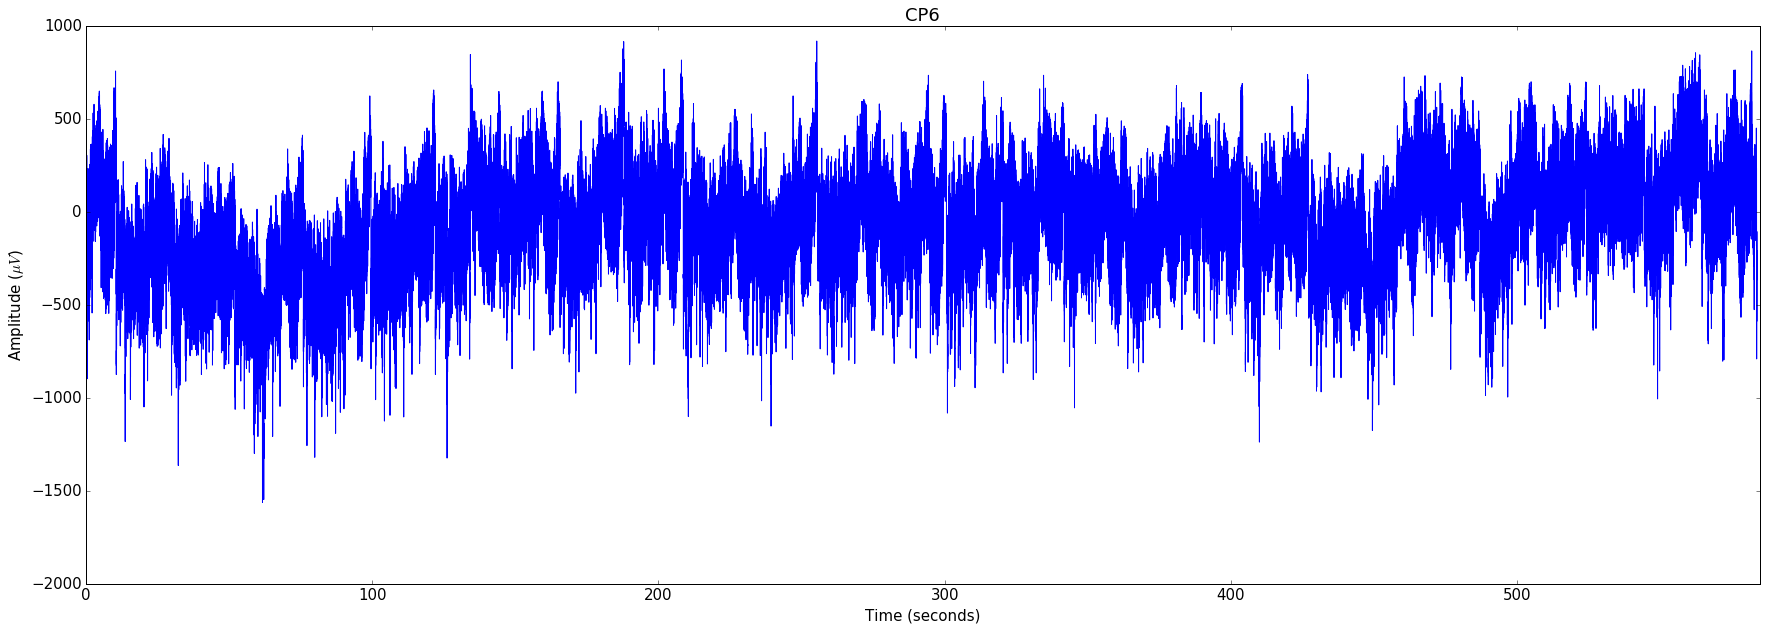

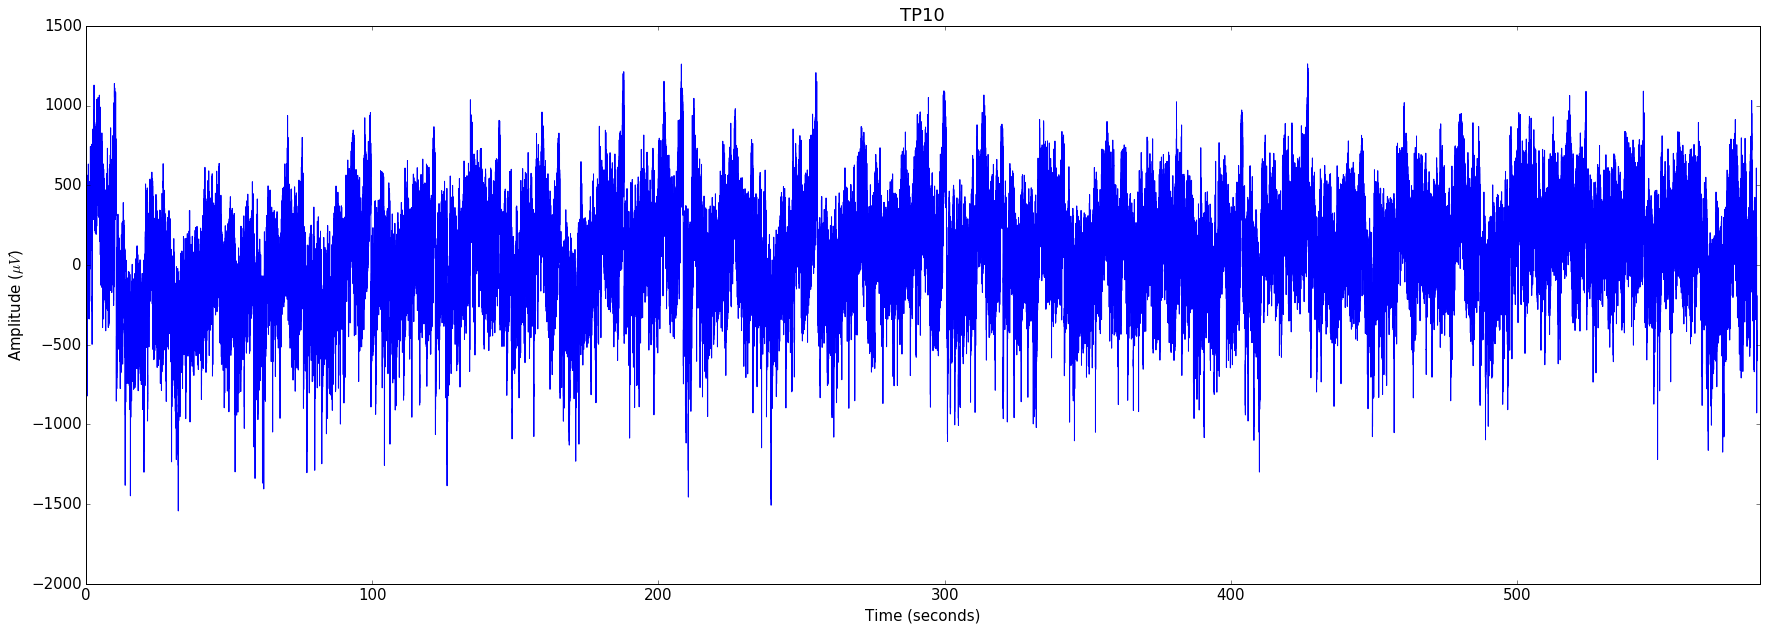

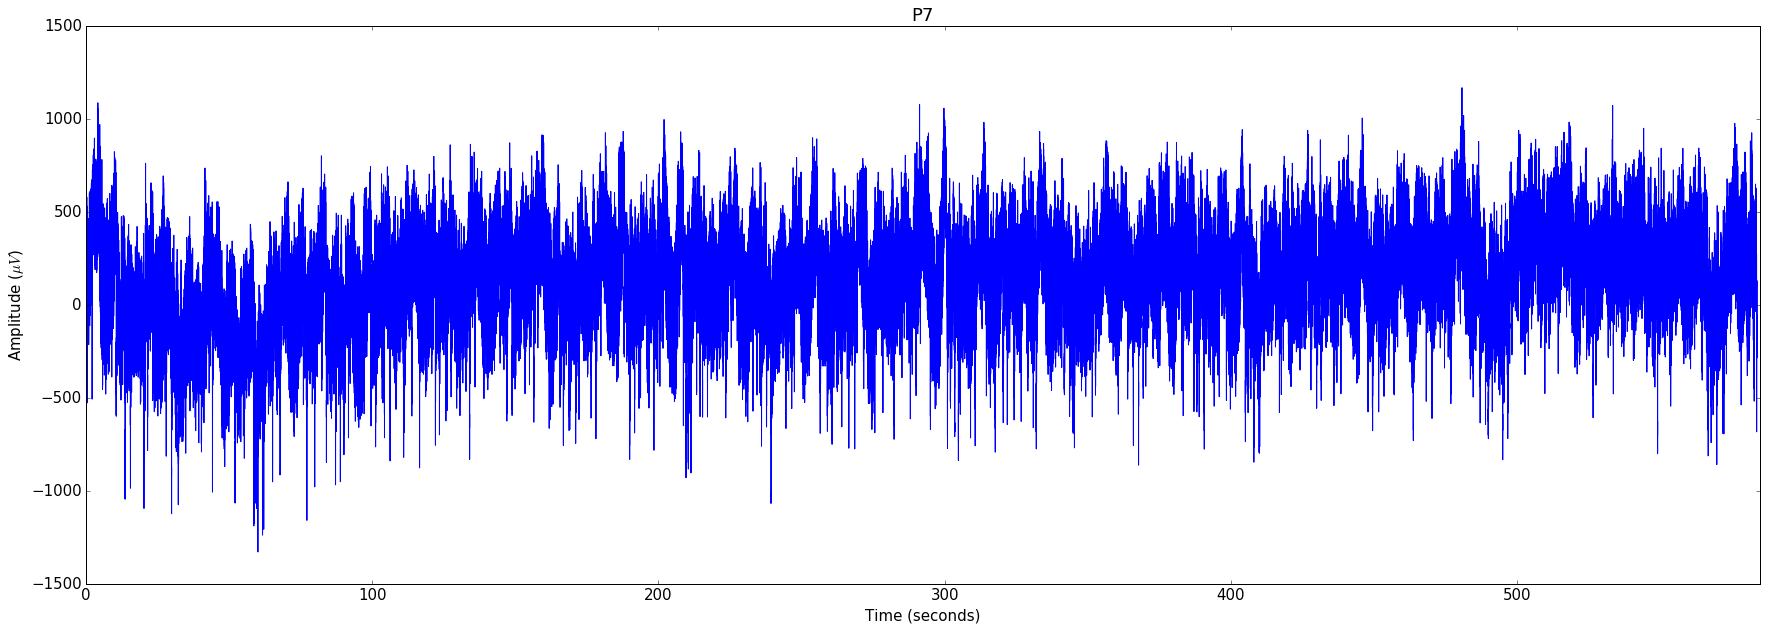

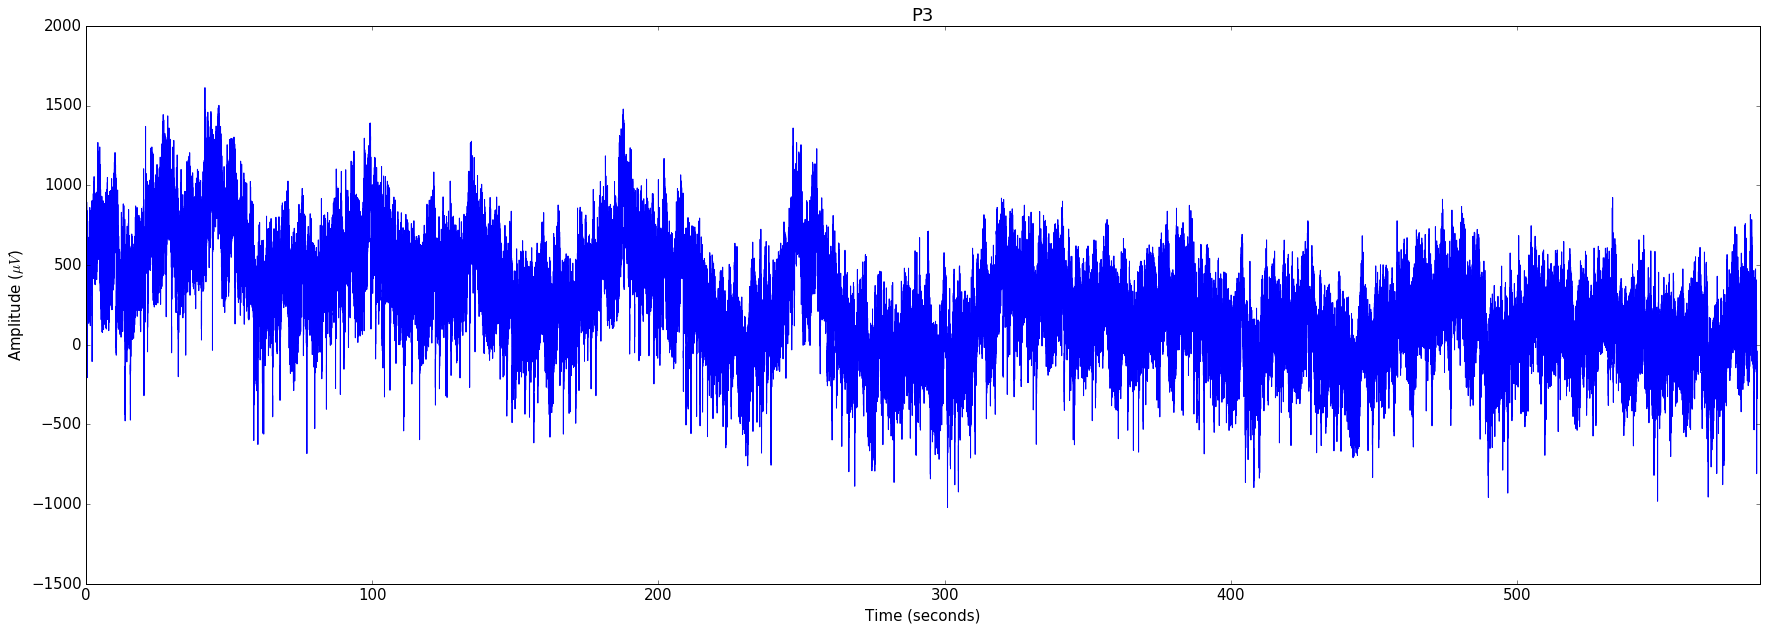

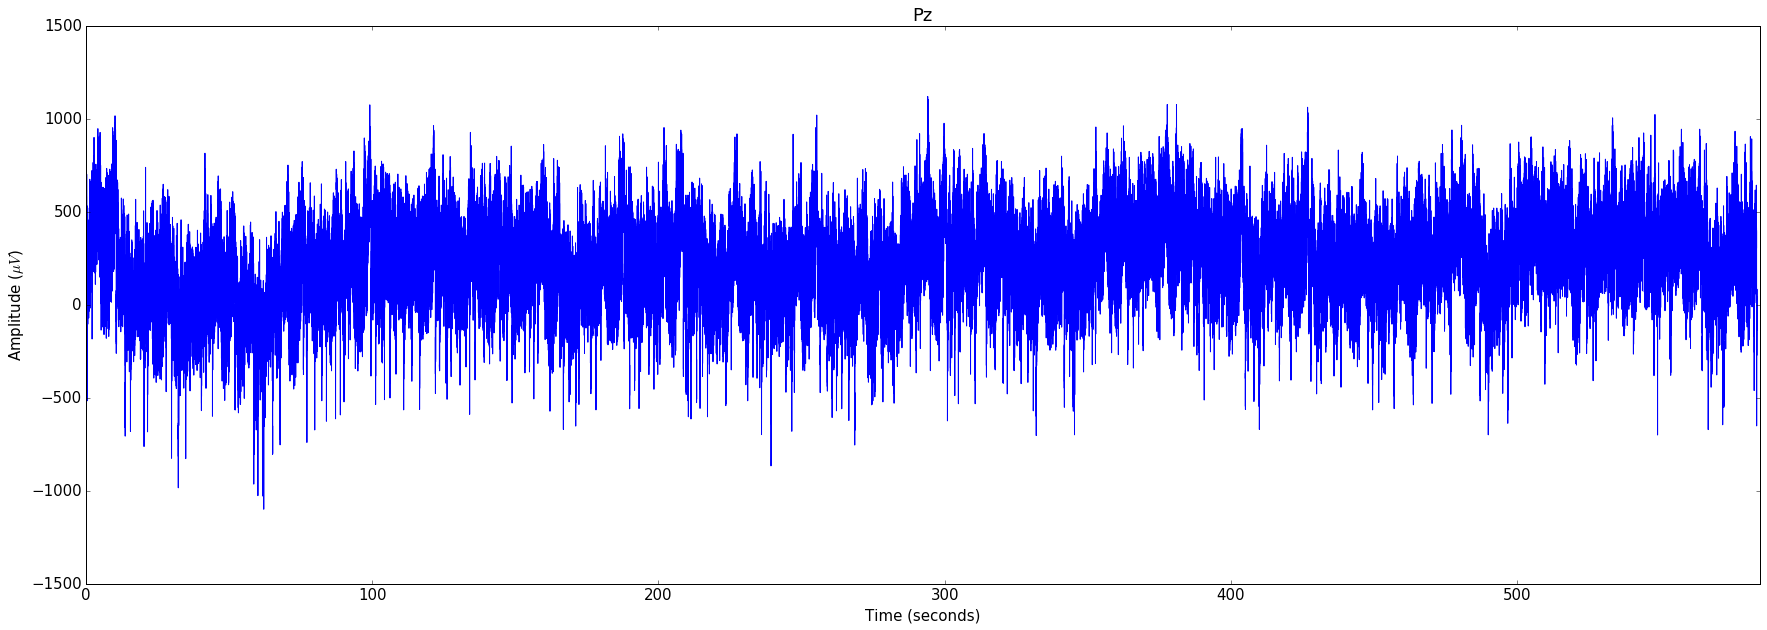

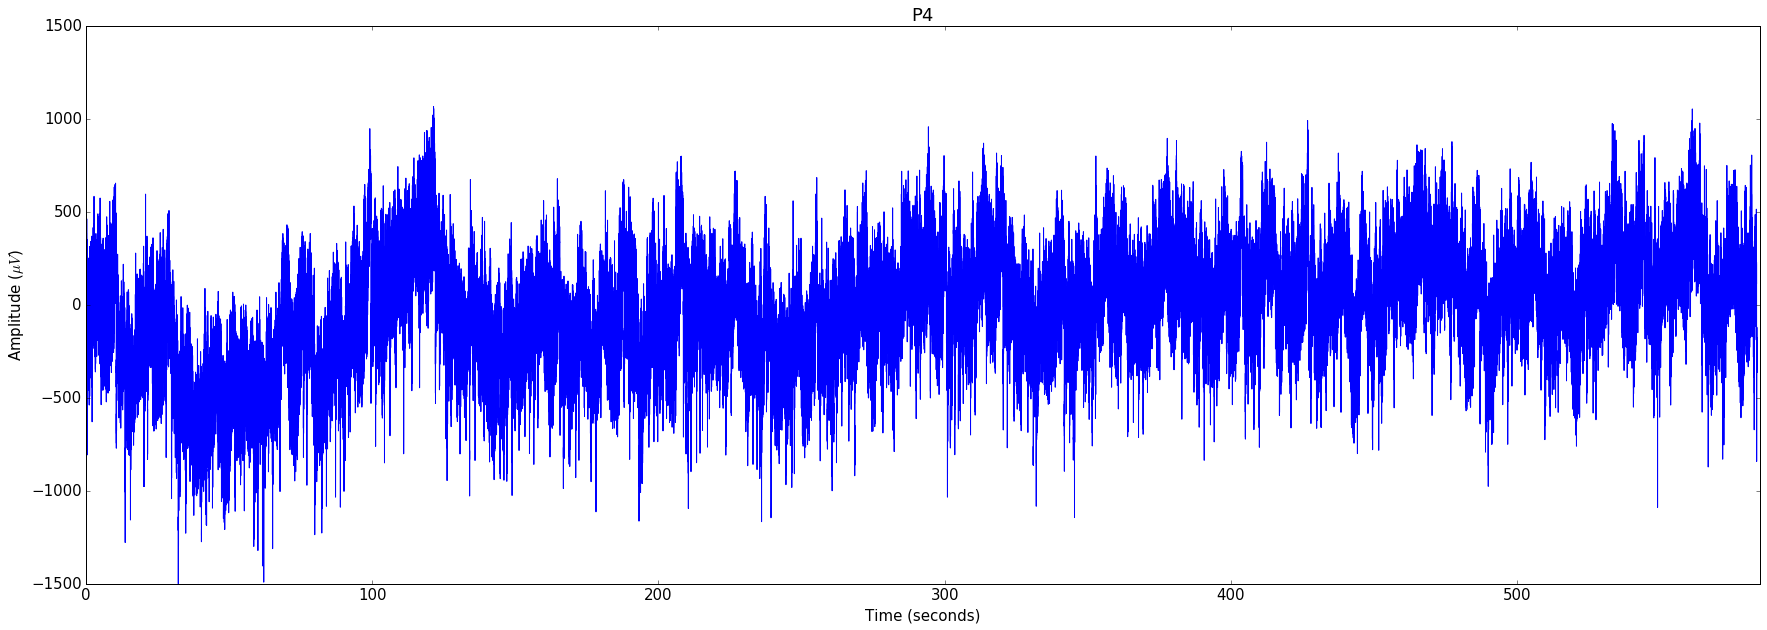

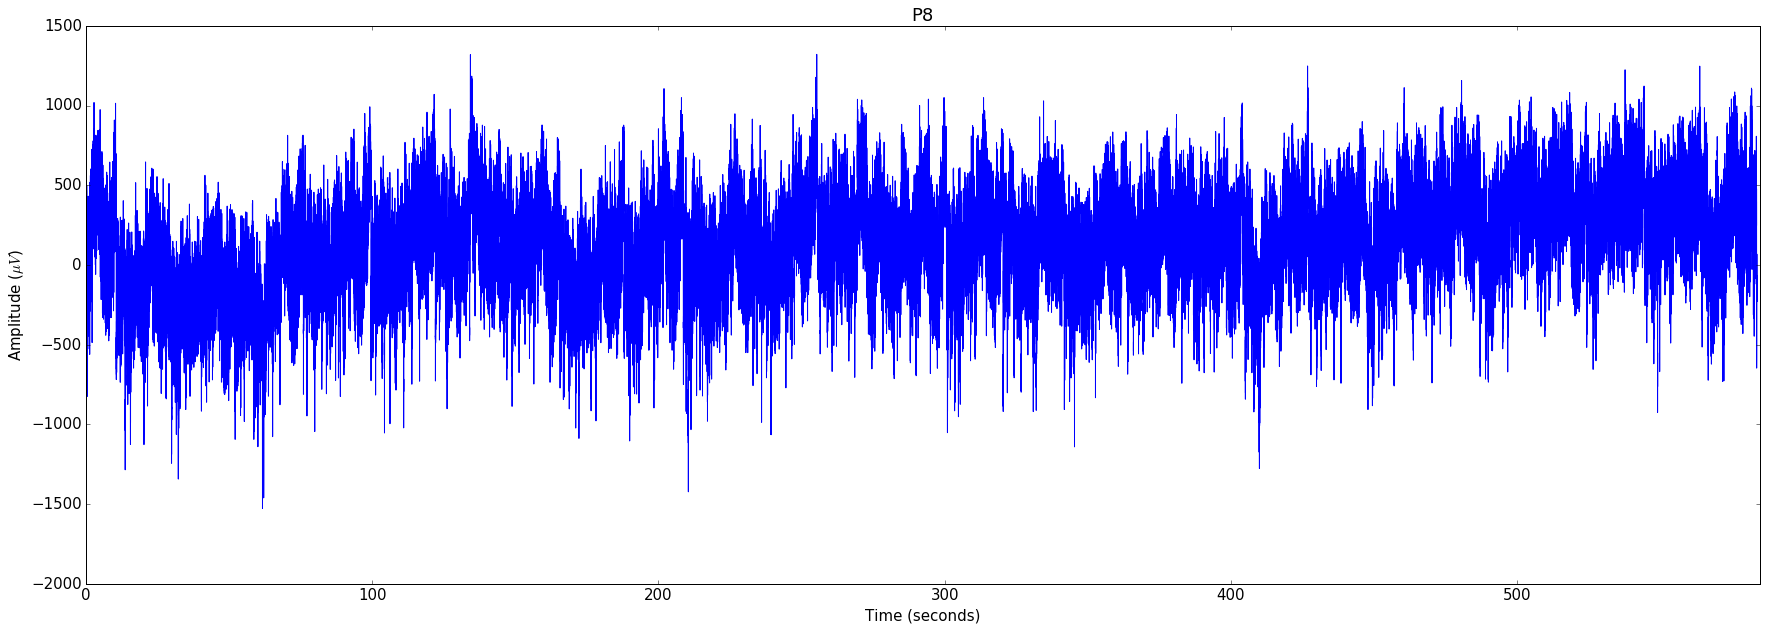

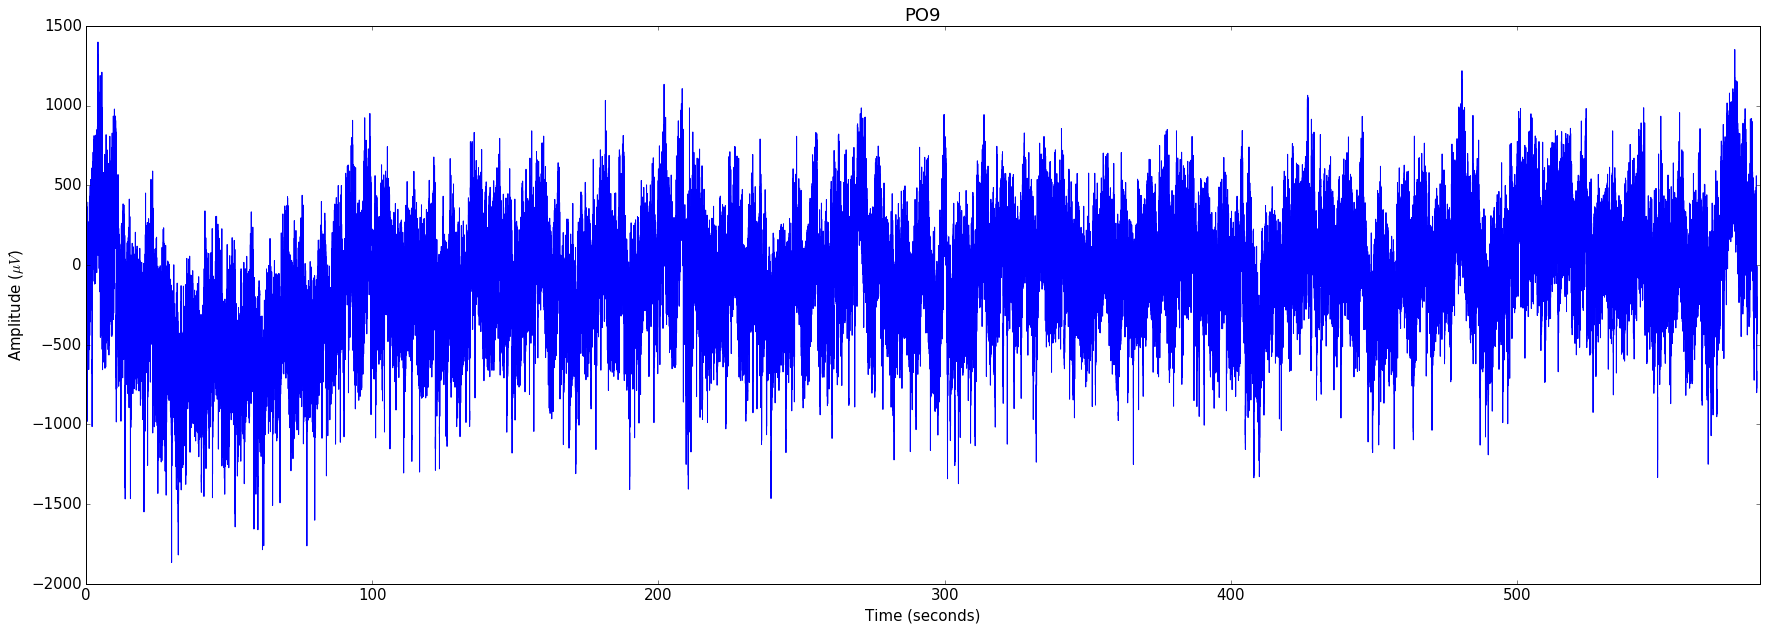

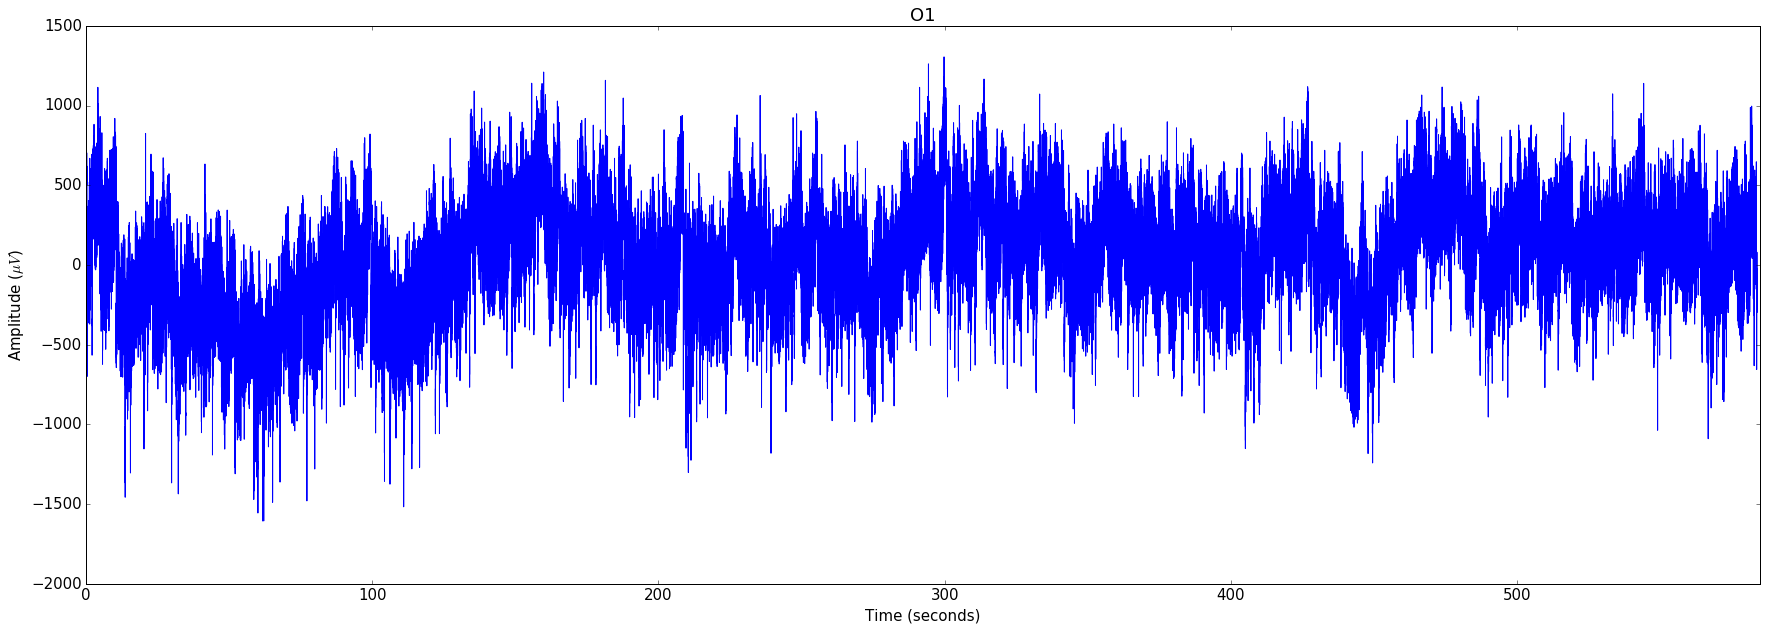

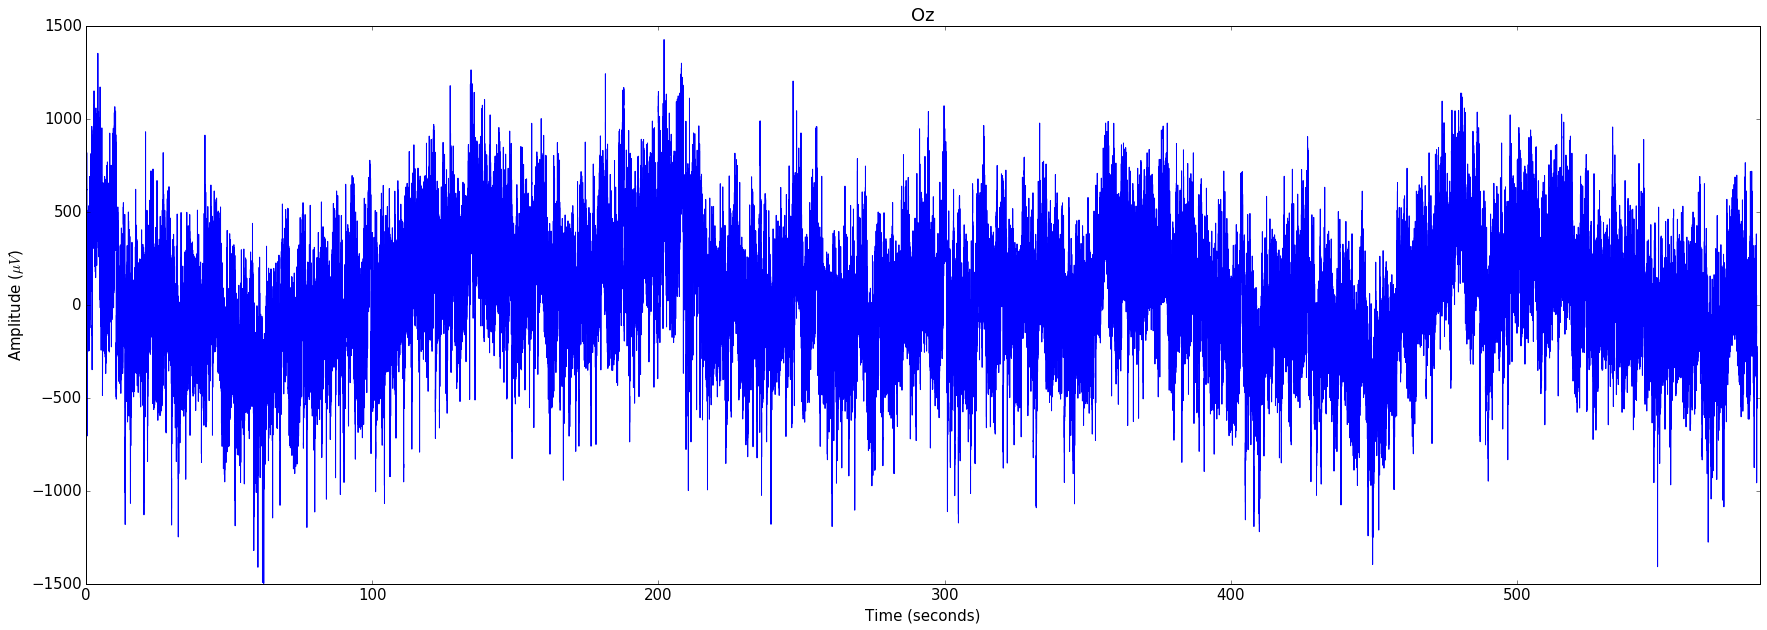

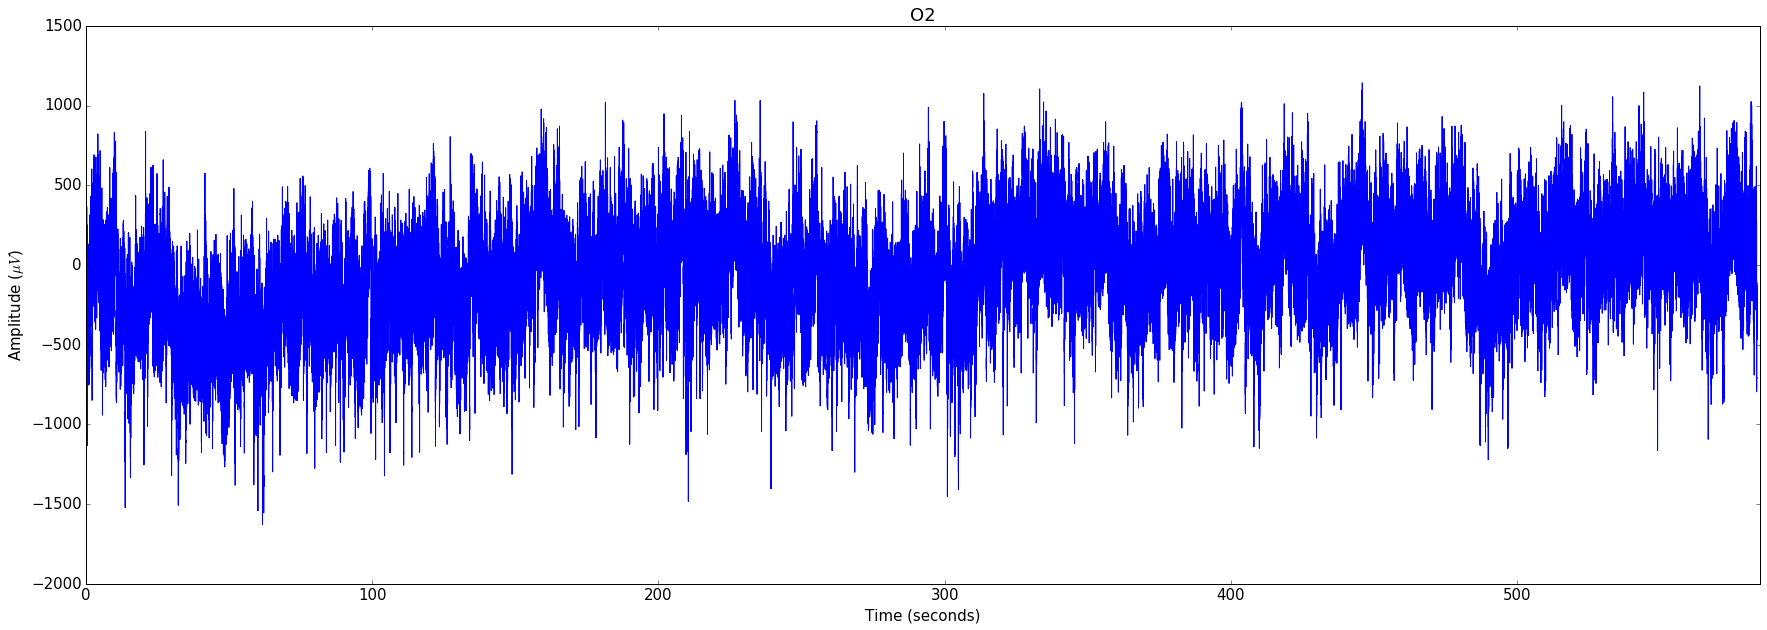

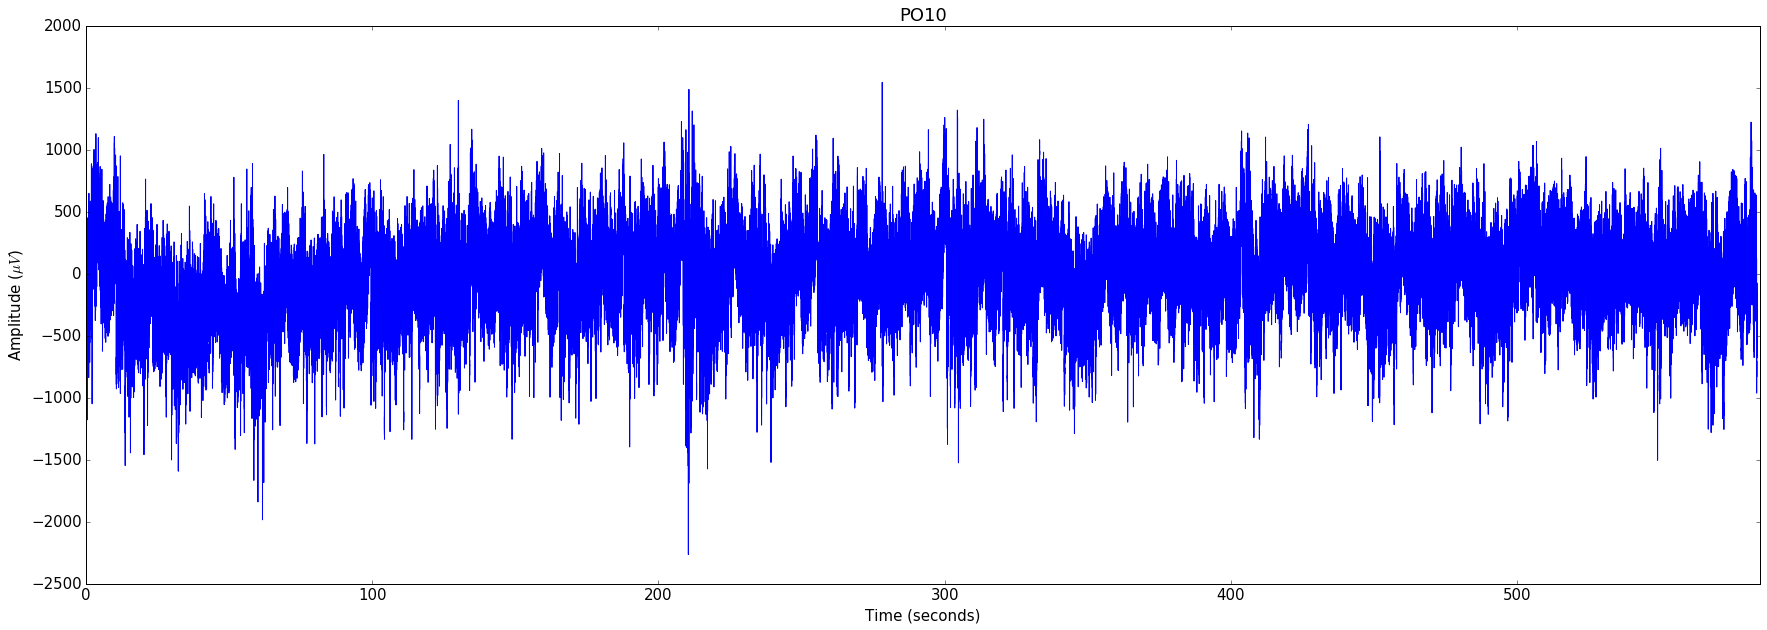

In [13]:
#let's look at the time series of all the plots
for col in series.columns:
    fig = plt.gcf()
    fig.set_size_inches((30, 10))
    #plt.plot(x_axis[:10000], series[col].values[:10000])
    plt.plot(x_axis, series[col].values)
    plt.xlabel('Time (seconds)')
    plt.ylabel(r'Amplitude ($\mu V$)')
    plt.xlim(0, x_axis[-1] + 1)
    #plt.xlim(0)
    plt.title(col)
    plt.show()
    plt.close()


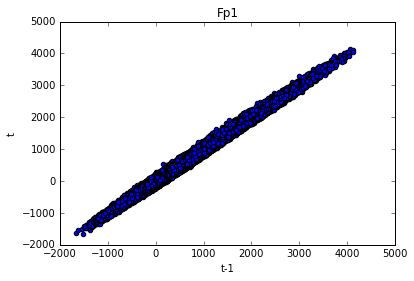

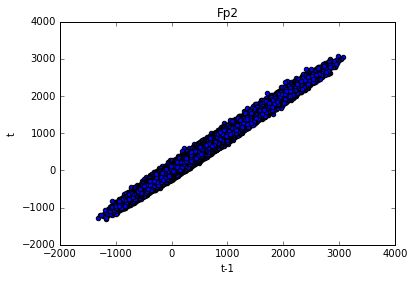

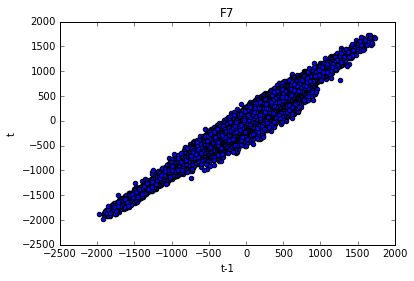

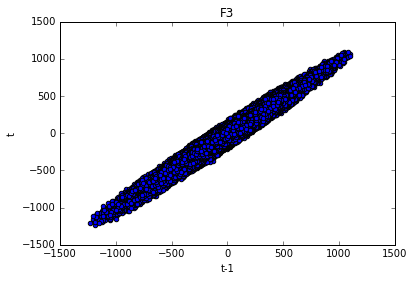

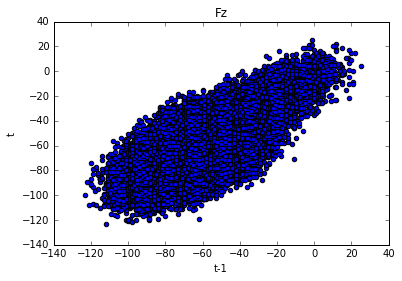

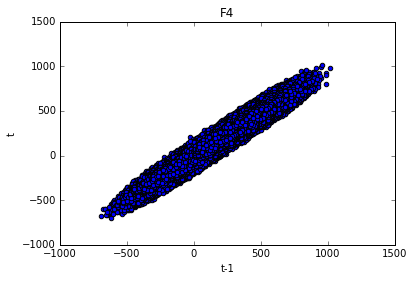

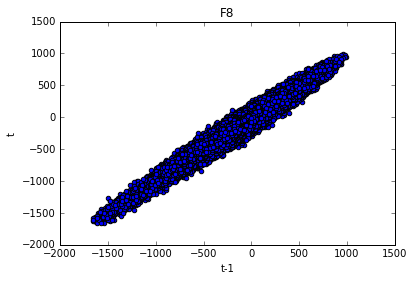

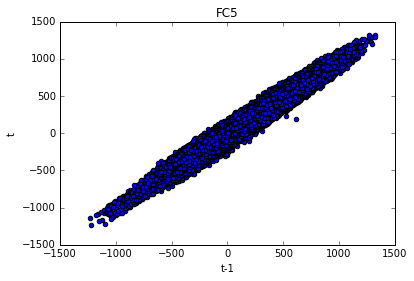

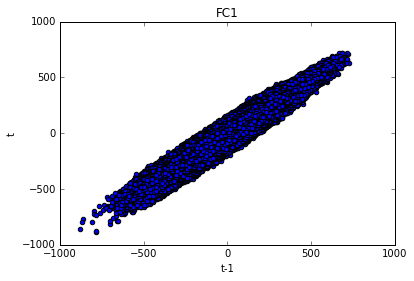

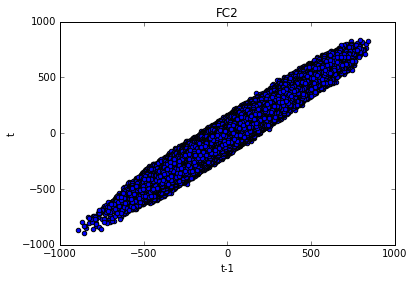

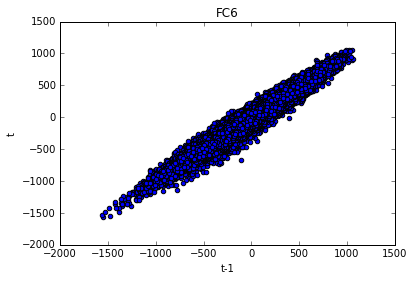

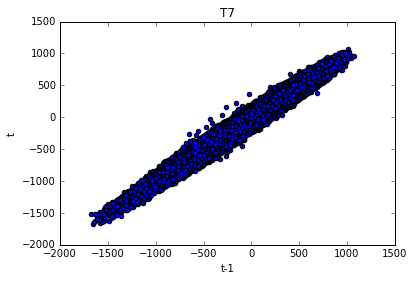

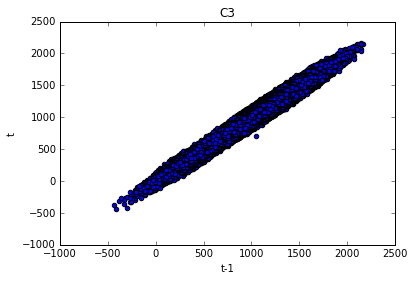

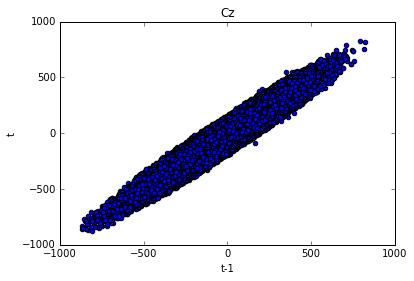

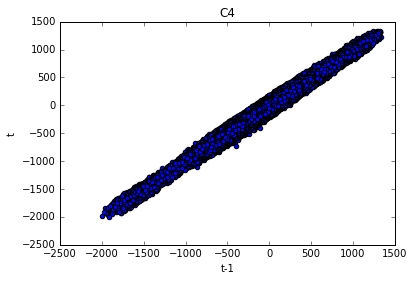

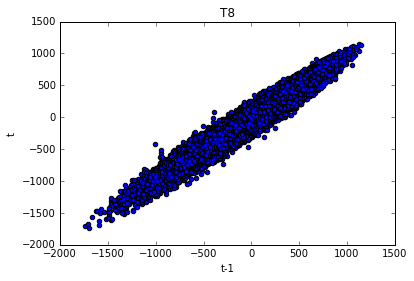

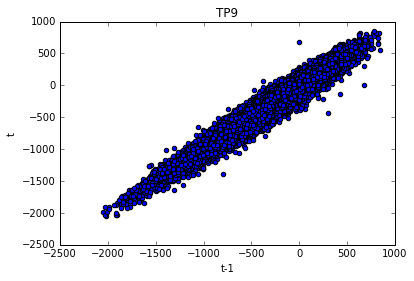

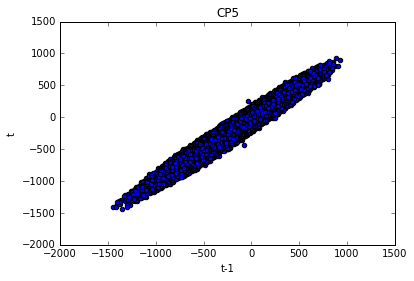

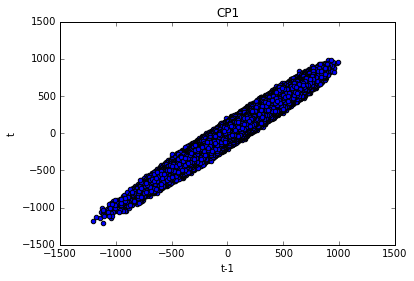

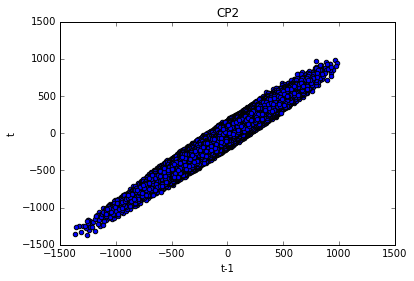

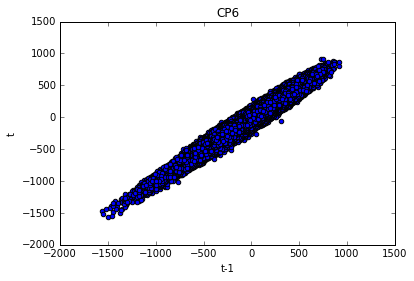

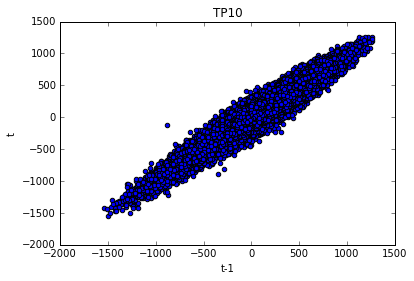

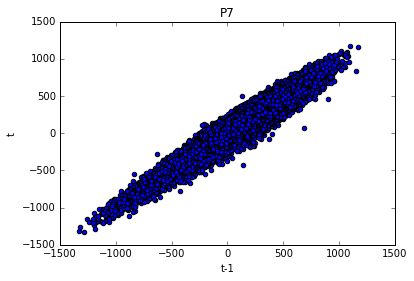

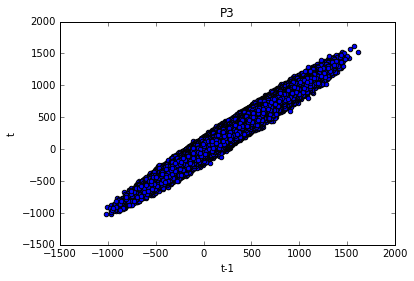

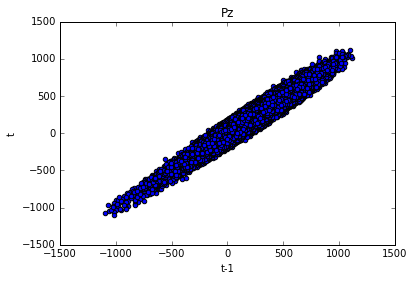

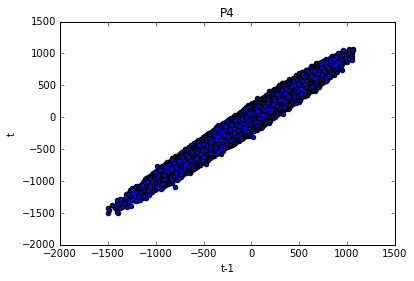

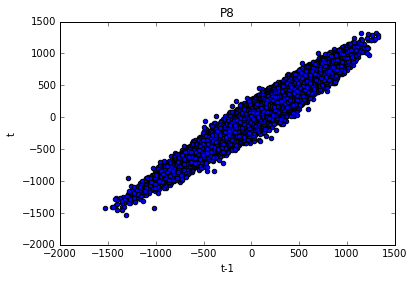

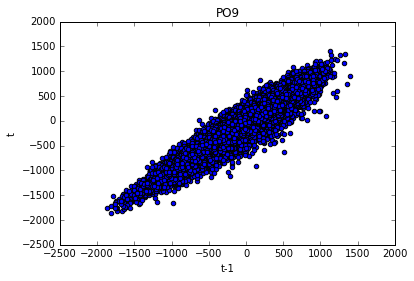

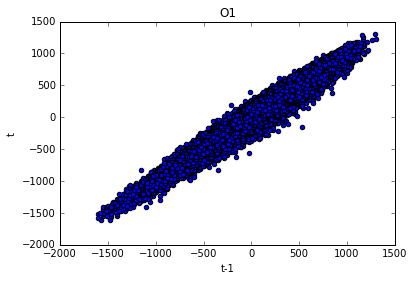

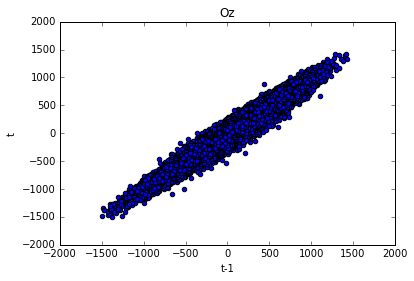

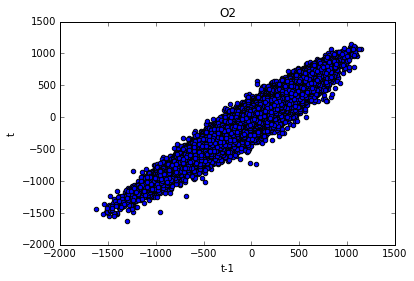

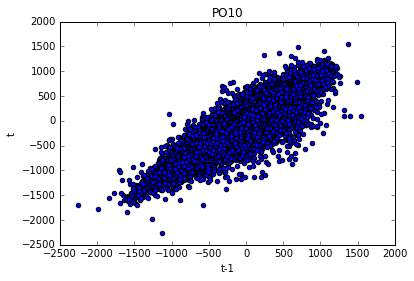

In [16]:
# autocorrelation plots
for col in series.columns:
    col_values = series[col].values
    plt.scatter(col_values[:-1], col_values[1:])
    plt.xlabel('t-1')
    plt.ylabel(r't')
    plt.title(col)
    plt.show()
    plt.close()

In [8]:
for i in range(series.shape[1]):
    print (np.corrcoef(series.values[1:, i], series.values[:-1, i])[0, 1])

0.990515089019
0.9865130432
0.975475463846
0.957267711526
0.621855653222
0.959964158492
0.967809076986
0.970554210705
0.937206740905
0.948507281235
0.963088874994
0.977864992687
0.971663542684
0.942663705148
0.976111708545
0.963147496089
0.9662747733
0.963672284362
0.958387725718
0.957373825996
0.960637597904
0.953679416372
0.949890764672
0.972752415566
0.946008654954
0.968291145687
0.957096594124
0.945292645961
0.965599081418
0.961505937658
0.953829834104
0.912006085401


In [17]:
covariance = np.cov(series.values.T)
corr = np.corrcoef(series.values.T)


for i in list(corr):
    print(i)

[ 1.          0.63716296  0.21053131  0.19730585 -0.03406214  0.02170911
 -0.16825238 -0.11054479 -0.09306136 -0.18612312 -0.25882654 -0.23789421
 -0.15783897 -0.23067465 -0.19031764 -0.31470316 -0.36007121 -0.24269462
 -0.16070455 -0.36341537 -0.34000966 -0.37301253 -0.32950699 -0.06691428
 -0.35497344 -0.37378154 -0.36257823 -0.32335039 -0.32853865 -0.23529975
 -0.37362137 -0.36384842]
[ 0.63716296  1.          0.4062434   0.18562705  0.13133408  0.2405716
  0.21319425  0.12303777  0.00271701  0.0603965   0.10239082  0.07649029
  0.07417253 -0.1051974   0.03199388  0.02103542 -0.05503052 -0.01504269
 -0.09779453 -0.00320976 -0.00607796 -0.09119186 -0.1085861  -0.31631374
 -0.1238026   0.0388912  -0.0332235  -0.03738329 -0.04027167 -0.12926568
 -0.06859521 -0.11046917]
[ 0.21053131  0.4062434   1.          0.36958079  0.18459326  0.35701748
  0.19854879  0.6434536   0.42811301  0.26512625  0.25429415  0.6785551
  0.31089058  0.22642283  0.28846322  0.25789682  0.45212029  0.50512129
 

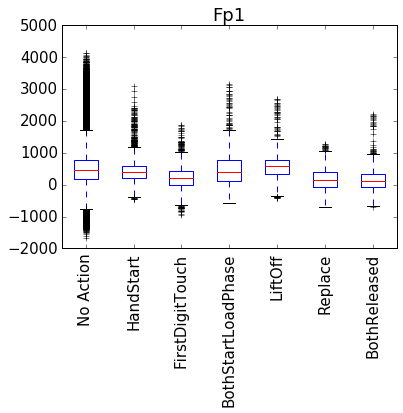

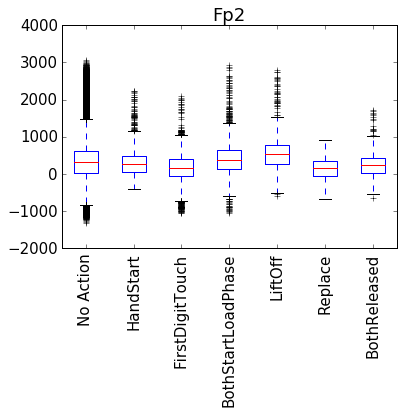

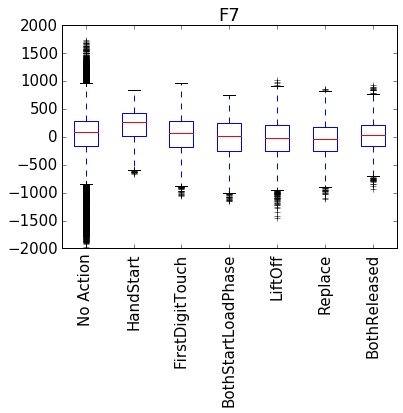

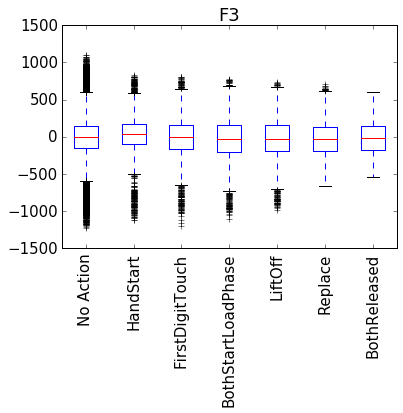

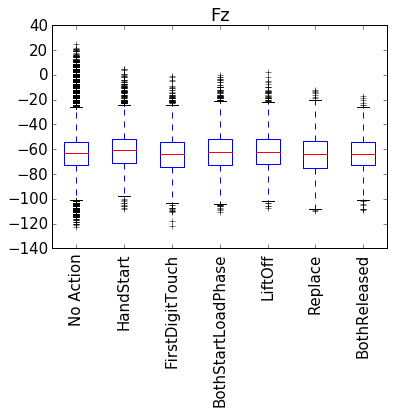

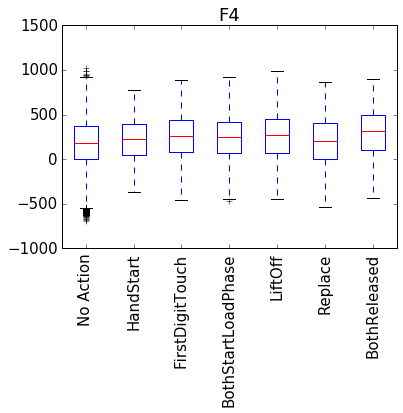

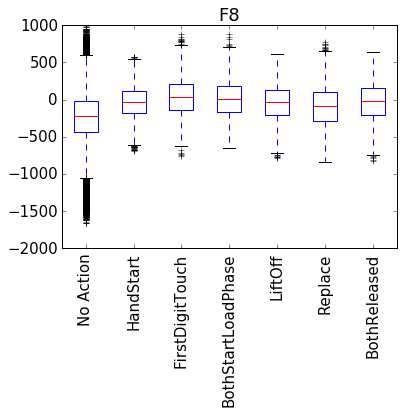

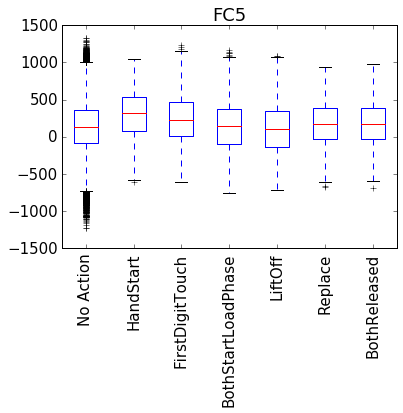

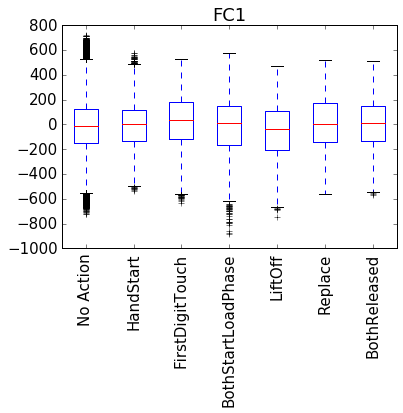

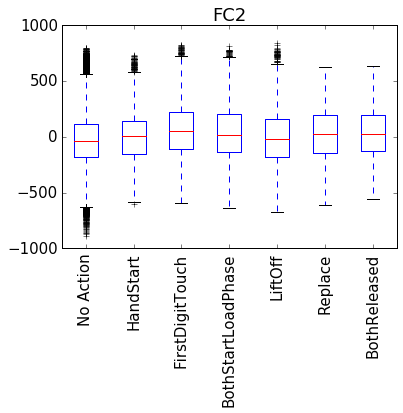

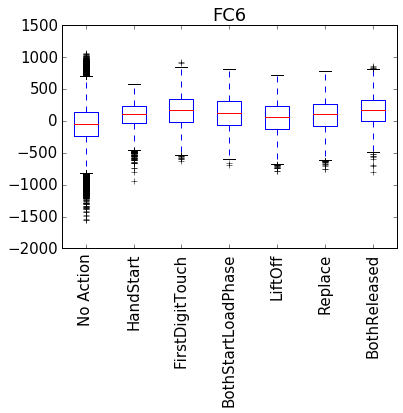

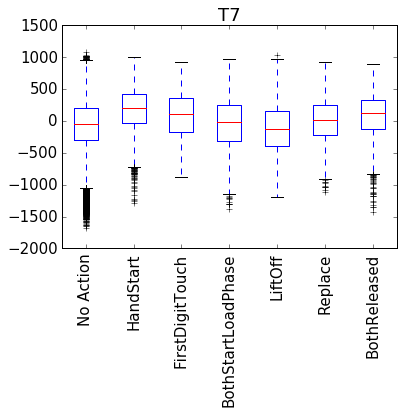

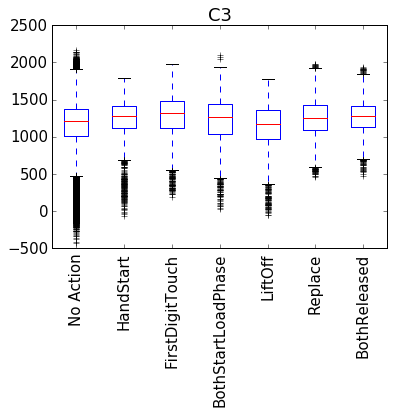

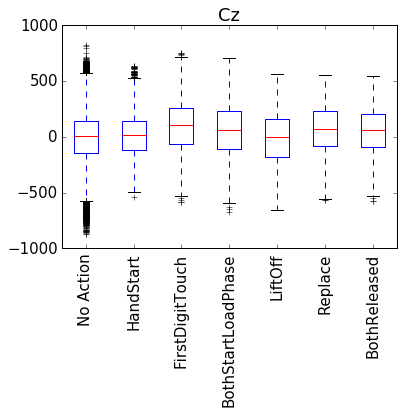

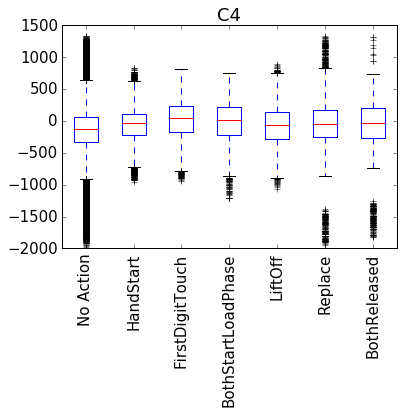

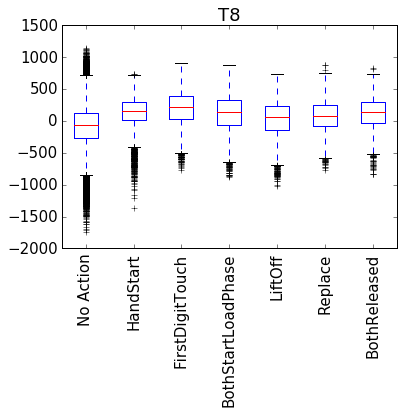

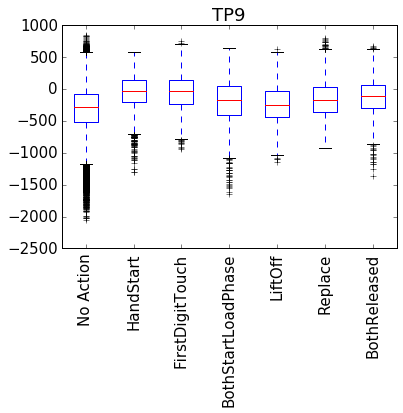

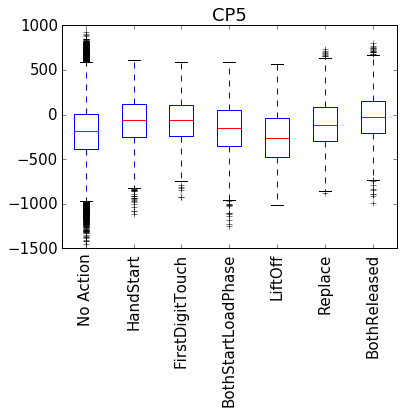

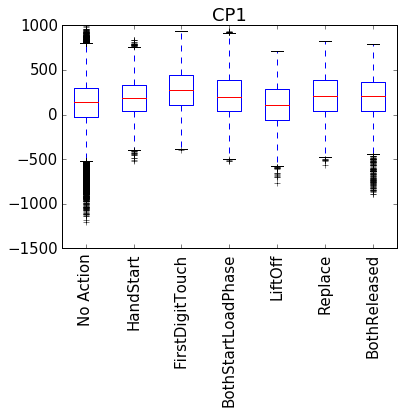

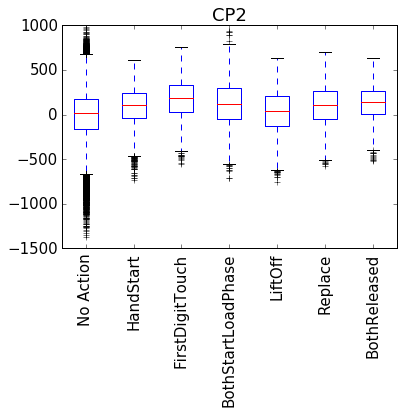

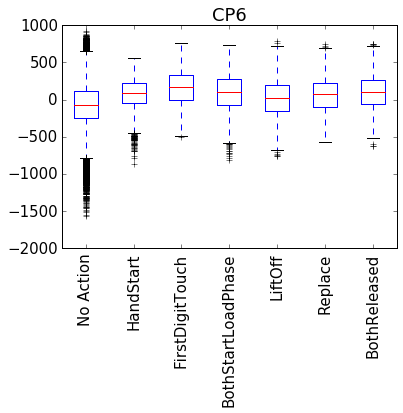

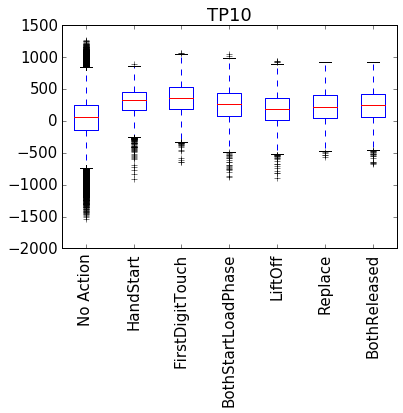

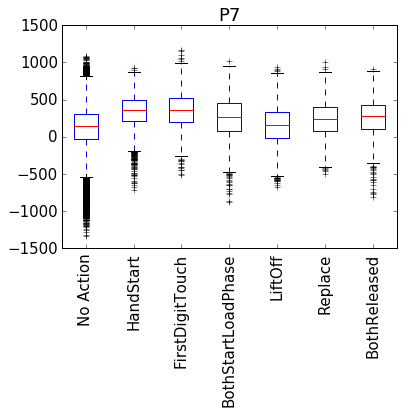

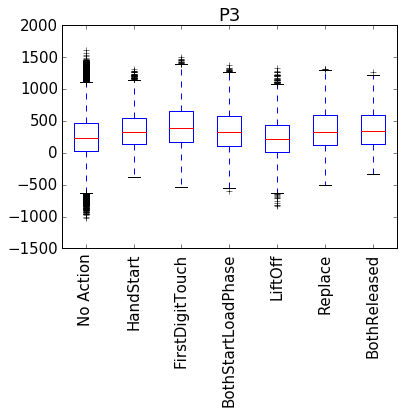

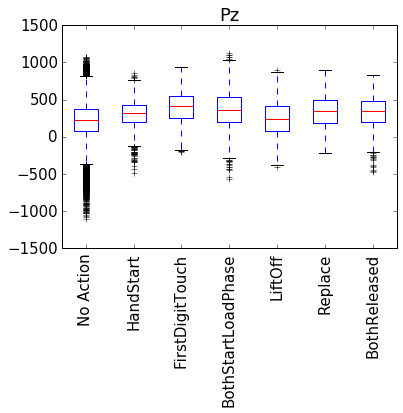

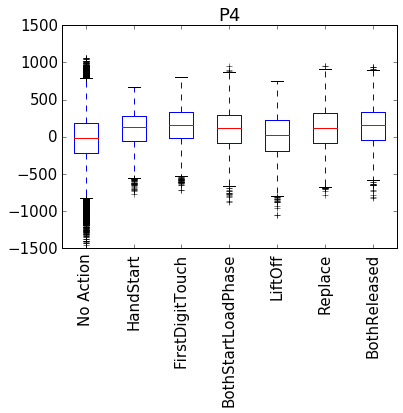

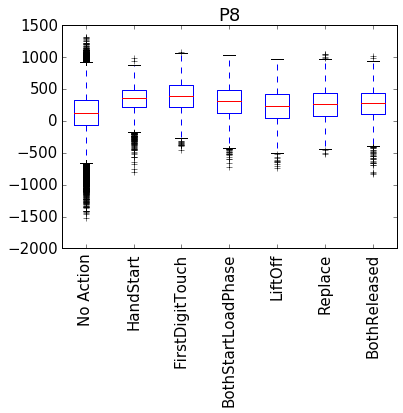

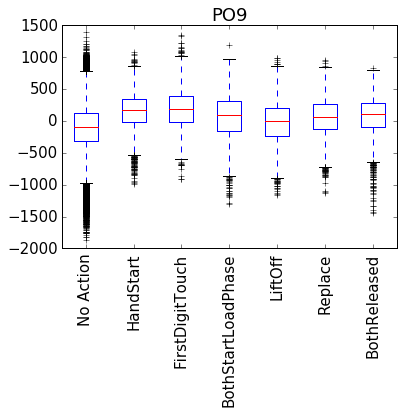

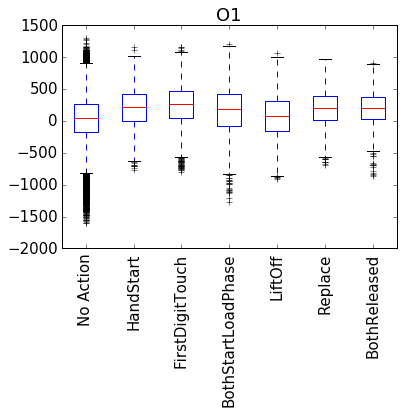

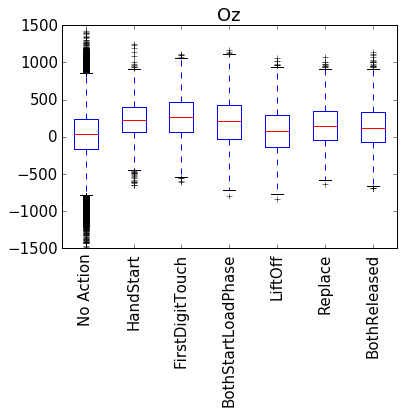

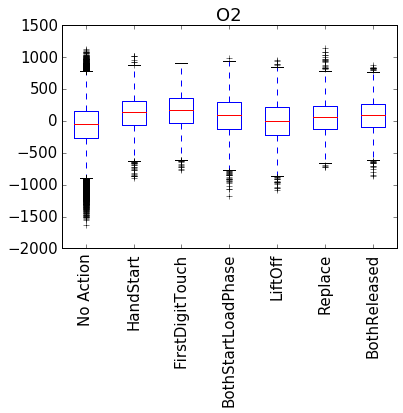

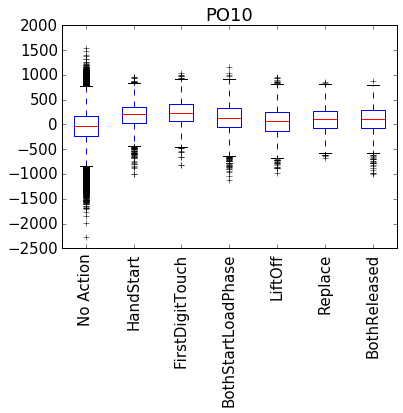

In [14]:
# distribution of the columns in the data split by features
num_classes = 7 # 6 activities plus no activity

for feature in series.columns:
    feature_by_label = []
    for i in range(num_classes):
        # for each class label, get the rows where the class happened
        indexes = np.where(labels == i)[0]
        feature_by_label.append(series[feature].values[indexes])
    plt.boxplot(feature_by_label)
    plt.title(feature)
    plt.xticks(locations[1:], names[:-1], rotation='vertical')
    plt.show()
    plt.close()

In [16]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X = series.values
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# lr.predict_proba gives a probability for each class
y_prob = lr.predict_proba(X)
y_prob



array([[  8.56634467e-01,   2.81184025e-02,   3.08975076e-02, ...,
          1.62218388e-02,   2.28286927e-02,   9.37792065e-04],
       [  8.60882829e-01,   2.65657668e-02,   2.97065794e-02, ...,
          1.73874985e-02,   2.49707939e-02,   1.11919771e-03],
       [  8.64921019e-01,   1.50751355e-02,   2.83753500e-02, ...,
          1.99798141e-02,   2.81125143e-02,   1.44880083e-03],
       ..., 
       [  9.68341401e-01,   8.21669535e-04,   8.27240653e-04, ...,
          2.29659686e-02,   1.88409511e-03,   1.02972895e-03],
       [  9.64976297e-01,   1.29611046e-03,   8.56413304e-04, ...,
          2.62422069e-02,   1.88183804e-03,   1.03078207e-03],
       [  9.68871872e-01,   9.67018538e-04,   7.89483606e-04, ...,
          2.27529239e-02,   1.93406610e-03,   1.08329738e-03]])

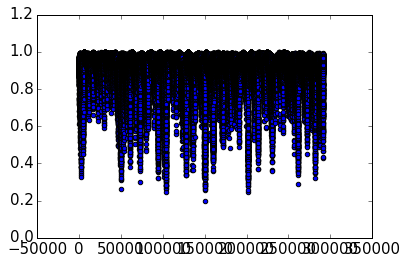

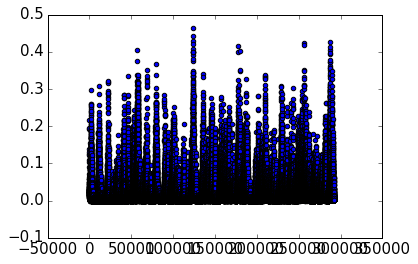

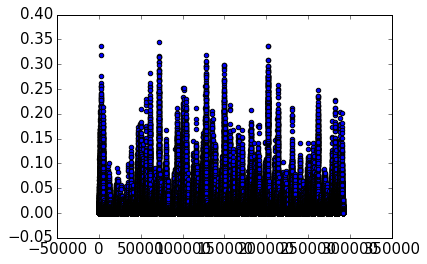

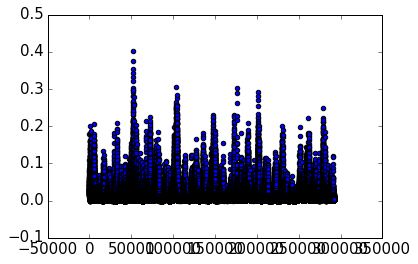

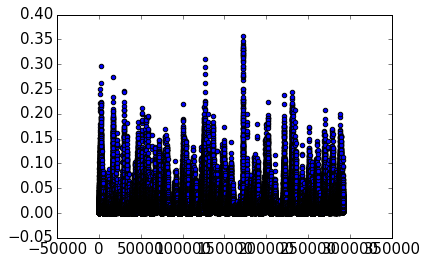

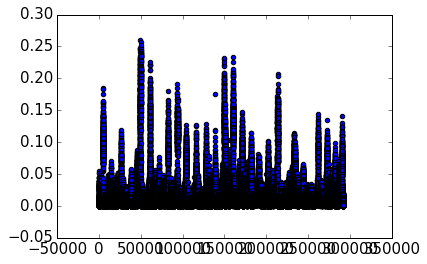

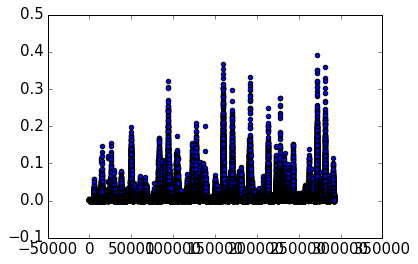

In [18]:
for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()


In [20]:
for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')


NameError: name 'roc_auc_score' is not defined

In [15]:
def extract_features(ts):
    """
    ts is the time series of labels as a numpy array
    """
    last_state = 0
    last_state_nz = 6
    time_since_last_nz = 2
    duration_of_cur_state = 1
    X = []
    for i in xrange(len(ts)):
        cur_state = ts[i]
        X.append([last_state, last_state_nz, time_since_last_nz, duration_of_cur_state])
        
        if last_state == cur_state:
            duration_of_cur_state += 1
        else:
            duration_of_cur_state = 0
        if cur_state != 0:
            last_state_nz = cur_state
            time_since_last_nz = 1
        else:
            time_since_last_nz += 1
        last_state = cur_state
    X = np.array(X)
    return X

X = extract_features(labels)

lr = LogisticRegression()
lr.fit(X, labels)

NameError: name 'xrange' is not defined

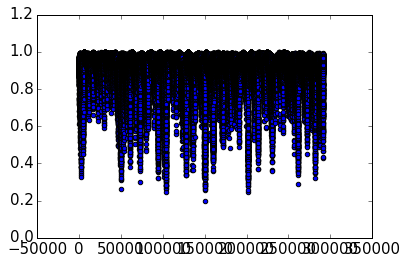

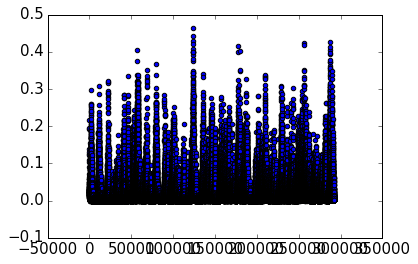

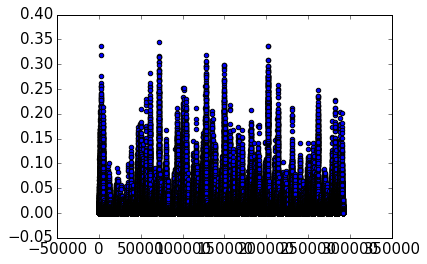

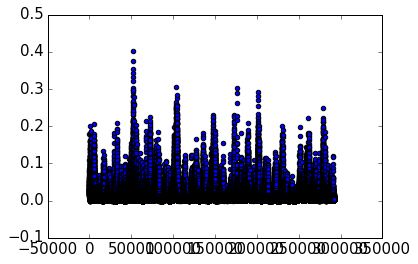

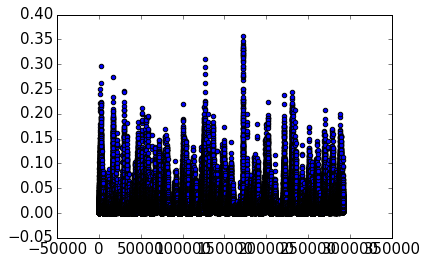

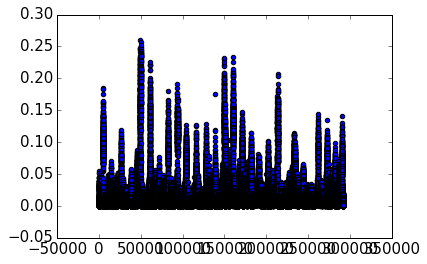

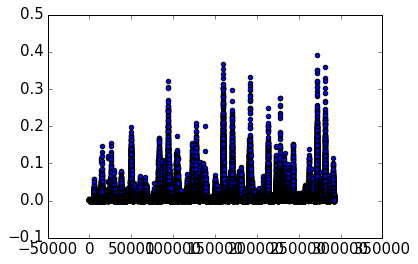

In [22]:
y_prob = lr.predict_proba(X)

for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [24]:
from sklearn.metrics import roc_auc_score

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')

No Action: 0.755943049956
HandStart: 0.862998362978
FirstDigitTouch: 0.851650931676
BothStartLoadPhase: 0.812597216273
LiftOff: 0.828267564856
Replace: 0.815813729877
BothReleased: 0.86084811041


In [25]:
from sklearn.metrics import precision_recall_fscore_support
y_true = labels
y_pred = np.argmax(y_prob, axis=1)
prec, rec, fscore, supp = precision_recall_fscore_support(y_true, y_pred)
print ("Precision:", ["%.3f" % i for i in prec])
print ("Recall:", ["%.3f" % i for i in rec])
print ("F-1 Score:", ["%.3f" % i for i in fscore])


Precision: ['0.922', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
Recall: ['1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
F-1 Score: ['0.959', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


/Users/xpandachuy/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
